In [2]:
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# for contours
import scipy.optimize as so
#phoutils isophote


My Topic: 
        Mass loss of dark matter and changes to the 
        internal dark matter profile of halos


Question that I am trying to answer:
        What is the #D shape of the dark matter distribution of M33 - 
        how does this change with time? Is it elongated/ellipsoid or spherical?
        what do terms like prolate, oblate, or triaxal halos mean


Right now I am focusing on determining what snapshots represent M33 at
its apecenter, pericenter, and midpoints in its orbit during the orbit
around M31
I have also made a first attempt at graphing those contour diagrams




I need to create a code meant to evaluate how the dark matter halo of the
M33 Galaxy evolves.
In order to do this, I am going to be looking a contour fitting of the dark matter halo,
as well as making density profiles of the dark matter in the galaxy.

I am going to be looking at several different snapshots during important moments of the merger. 
With this, I will be able to examine the tidal evolution of M33.



First, I need to determine the points during the merger that I would like to look at
To start, I am going to look at a couple the pericenters and apocentes of M33s dark matter halo
in order to determine the snapshots that I would like to graph



In [5]:
#time, total, data = Read('M33_000.txt')


In [6]:
#print (data['m'])
#print (data['type'])

In [14]:
"""
Here I am loading in the data that was calculated during homework 6
to get the position of M33 and M31 at several different points in time
"""
dataM31 = np.genfromtxt("orbit_M31.txt",dtype=None,names=True)
dataM33 = np.genfromtxt("orbit_M33.txt",dtype=None,names=True)

In [16]:
"""
This function is from HW6, it is used to determine the distance between the center of masses of two galaxies as a function of time
in order to determine which points I want to look at the structure of M33, im going to need to have this data available first
"""

# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit 

def dvectors(file1,file2):
    """
    This function loops over the datafiles for position and velocity vectors of two galaxies and creates 2
    lists that represents how the magnitudes of the distance and velocity between the two galaxies change over time
    Inputs:
        file1: the file containing the time, position, and velocity data for one of the galaxies
        file2: the file containing the time, position, and velocity data for the other galaxy

    Outputs:
        dis: A list containing the distance between two galaxies over time
        vel: A list containing the velcoity between two galaxies over time
    """
    dist = np.zeros(len(file1))
    vdist = np.zeros(len(file1))
    time = np.zeros(len(file1))
    for i in range(len(file1)):
        # Gathers position and velocity data for each point in time 
        x1 = file1[i][1]
        y1 = file1[i][2]
        z1 = file1[i][3]
        vx1 = file1[i][4]
        vy1 = file1[i][5]
        vz1 = file1[i][6]
        x2 = file2[i][1]
        y2 = file2[i][2]
        z2 = file2[i][3]
        vx2 = file2[i][4]
        vy2 = file2[i][5]
        vz2 = file2[i][6]
        t1 = file1[i][0] *1e-3
        # Computes the magnitudes of distance and velocity for each galaxy and stores them
        # as a data point on an array
        dist[i] = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
        vdist[i] = np.sqrt((vx1-vx2)**2+(vy1-vy2)**2+(vz1-vz2)**2)
        time[i] = t1
        #converts arrays to lists
        tim = time.tolist()
        dis = dist.tolist()
        vel = vdist.tolist()
    return dis,vel,tim
        
        
        
    


In [18]:
M3133 = dvectors(dataM31,dataM33)

In [20]:
def deriv(dist,vel,time):
    """
    This function takes the file created in distance and computes areas where
    the derivative of the distance is roughly zero. 
    (It's worth noting that this is an extremely crude approximation, but as shown later, it works in this case)
    It also computes the midpoints in time between these derivatives
    for now, I am using the data from the .txt files created in homework 6, where we stored the center of mass of the galaxies
    at several different intervals. 
    After finding the indexes that I am looking for, and separating them into lists for apocenter, pericenter, and midpoint,
    I multiply the index values by 5 to get the snapshot
    note: 5 is the interval in which I wrote certain snapshots into the .txt file from homework 6
    """
    #dist, vel, time = 
    apo = []
    an = []
    pn = []
    per = []
    apo_t = []
    per_t = []
    index = []
    points = []
    points_t = []
    #distance = []
    #time = []
    n = 0
    nstep = 'min'
    while n < len(time)-1:
        if nstep == 'max':
            if dist[n] > dist[n+1]:
                apo.append(dist[n])
                points.append(dist[n])
                apo_t.append(time[n])
                points_t.append(time[n])
                index.append(n)
                an.append (n)
                nstep = 'min'
        if nstep == 'min':
            if dist[n] < dist[n+1]:
                per.append(dist[n])
                points.append(dist[n])
                per_t.append(time[n])
                points_t.append(time[n])
                index.append(n)
                pn.append(n)
                nstep = 'max'
        n = n+1
    midpoints = []
    m = 0
    while m < len(index)-1:
        midpoints.append(int(np.round((index[m]+(index[m+1]))/2,0)))
        m = m+1
    apo_snaps = np.array(an)*5
    peri_snaps = np.array(pn)*5
    mid_snaps = np.array(midpoints)*5
    return apo_snaps, peri_snaps, mid_snaps, apo_t, per_t
    #return apo,apo_t,per,per_t,index,points,points_t,an,pn
        


In [22]:
dist, vel, time = M3133

In [24]:
#a,at,p,pt,index,points,points_t,an,pn = deriv(dist,vel,time)
apo_snaps, peri_snaps, mid_snaps, at, pt = deriv(dist,vel,time)

In [26]:
print (apo_snaps)

[185 380 525 625 705 775]


In [28]:
#print (mid_snaps)

In [30]:
#print (peri_snaps)


At this point, I have narrowed down the snapshots that i want to use by a lot
Now I would love to use a for loop to gather the data for each snapshot and then plot them
One thing that I am stuck on is how to mark what direction M31 is on the graph


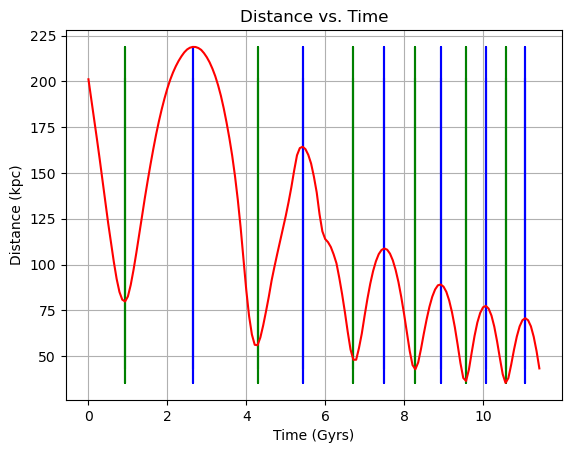

In [33]:
"""
Here I am graphing my pericenter and apocenter points over the graph from Homework 6
to confirm that my code works
"""
distances2 = M3133[0] # gets the distances from M3133
time_2 = M3133[2] # gets the times from M3133
for i in at:
    j = [i]
    k = j * len(distances2)
    plt.plot(k,distances2, linestyle='-', color='blue', label = 'apocenter')
for i in pt:
    j = [i]
    k = j * len(distances2)
    plt.plot(k,distances2, linestyle='-', color='green', label = 'pericenter')
plt.plot(time_2,distances2, linestyle='-', color='red', label = 'simulation')
#plt.plot(tesst2,distances2, linestyle='-', color='blue', label = 'test') 
plt.xlabel("Time (Gyrs)")
plt.ylabel("Distance (kpc)")
plt.title("Distance vs. Time")
#plt.ylim(0,800)
plt.grid(True)
#plt.legend()
plt.show()

In [35]:
"""
Here I use the code in lab  to create a confidence interval
This part is not done yet
"""

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, 
         colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), density=True)
    # NOTE : if you are using the latest version of python, in the above: 
    # instead of normed=True, use density=True
    
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.25))
    new_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.50))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.66))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.85))
    
    
    # You might need to add a few levels


    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, new_sigma, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = ['0.25','0.50','0.66', '0.85'][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour



In [37]:
"""
Here I am putting the stuff from lab 7 into one function to make things a little cleaner later on
"""
def create_graph(filename,ptype):
    COMD = CenterOfMass(filename,ptype)
    COMP = COMD.COM_P(0.1)
    COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])
    # Determine positions of disk particles relative to COM 
    xD = COMD.x - COMP[0].value 
    yD = COMD.y - COMP[1].value 
    zD = COMD.z - COMP[2].value 

    # total magnitude
    rtot = np.sqrt(xD**2 + yD**2 + zD**2)

    # Determine velocities of disk particles relatiev to COM motion
    vxD = COMD.vx - COMV[0].value 
    vyD = COMD.vy - COMV[1].value 
    vzD = COMD.vz - COMV[2].value 

    # total velocity 
    vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)

    # Arrays for r and v 
    r = np.array([xD,yD,zD]).T # transposed 
    v = np.array([vxD,vyD,vzD]).T
    #graph(xD,yD)
        
    # M31 Disk Density 
    fig, ax= plt.subplots(figsize=(12, 10))

    # ADD HERE
    # plot the particle density for M31 using a 2D historgram
    # plt.hist2D(pos1,pos2, bins=, norm=LogNorm(), cmap='' )
    # cmap options: 
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
    #   e.g. 'magma', 'viridis'
    # can modify bin number to make the plot smoother
    plt.hist2d(xD,yD,bins = 1500, norm = LogNorm(), cmap='viridis')
               #,range=[[-40, 40], [-40, 40]])
    #print(xD)
    cbar = plt.colorbar()
    cbar.set_label("Number of disk particle per bin", fontsize=15)

    # ADD HERE
    # make the contour plot
    # x pos, y pos, contour res, contour res, axis, colors for contours.
    # remember to adjust this if there are other contours added
    # density_contour(pos1, pos2, res1, res2, ax=ax, colors=[])

    density_contour(xD,yD,80,80,ax = ax, colors=['yellow','red','green','cyan'])

    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('y (kpc)', fontsize=22)

    #set axis limits
    plt.ylim(-400,400)
    plt.xlim(-400,400)

    #adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size



    # Save to a file
    #plt.savefig('Lab7_M31Disk.png')
    plt.show()
    


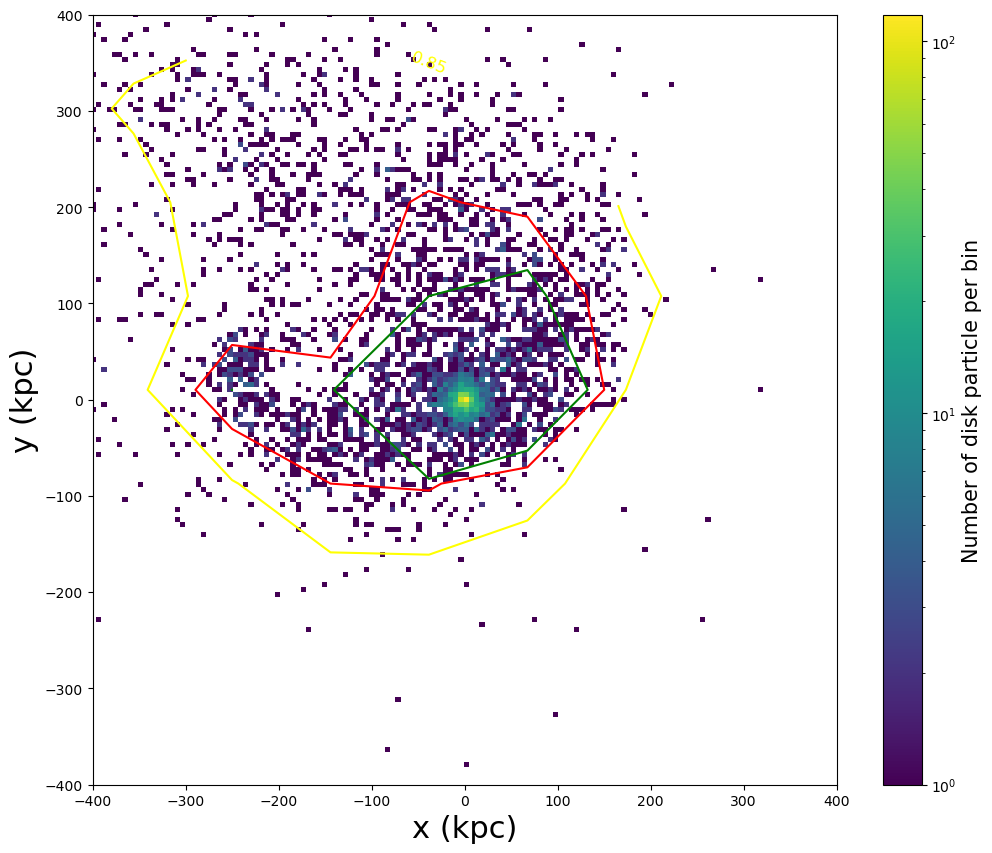

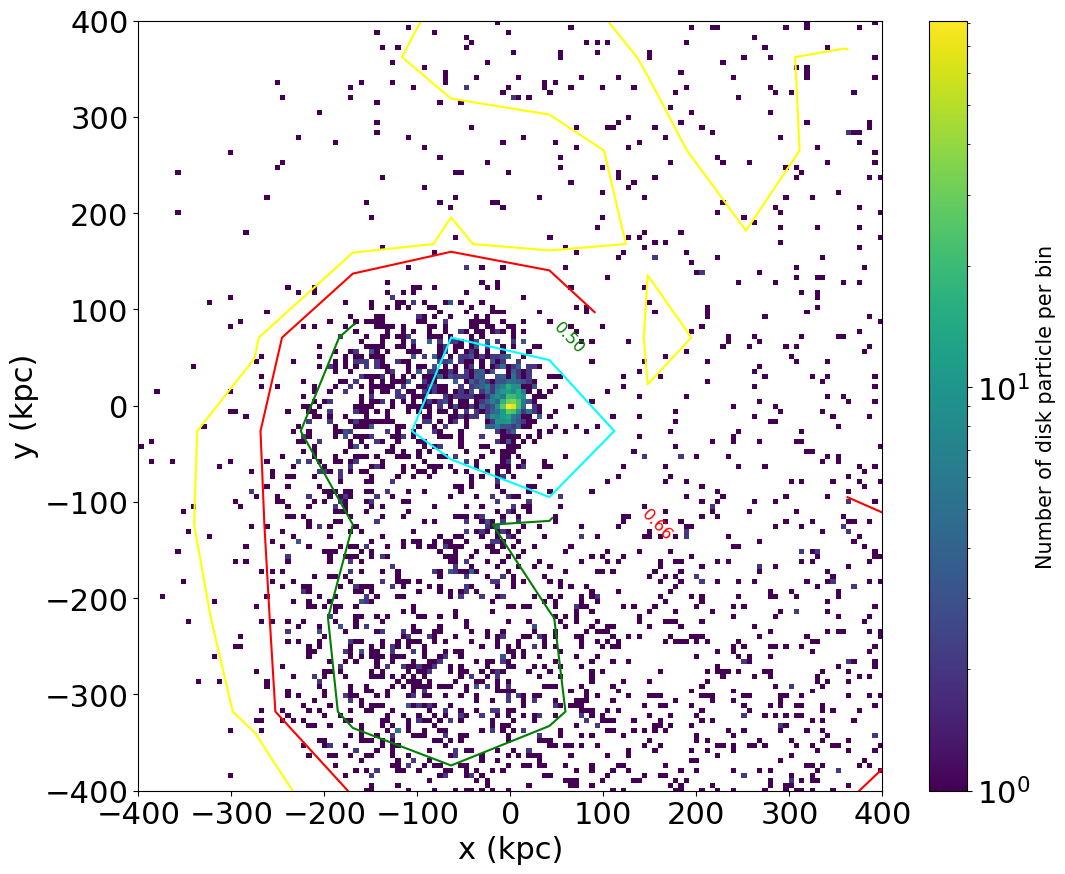

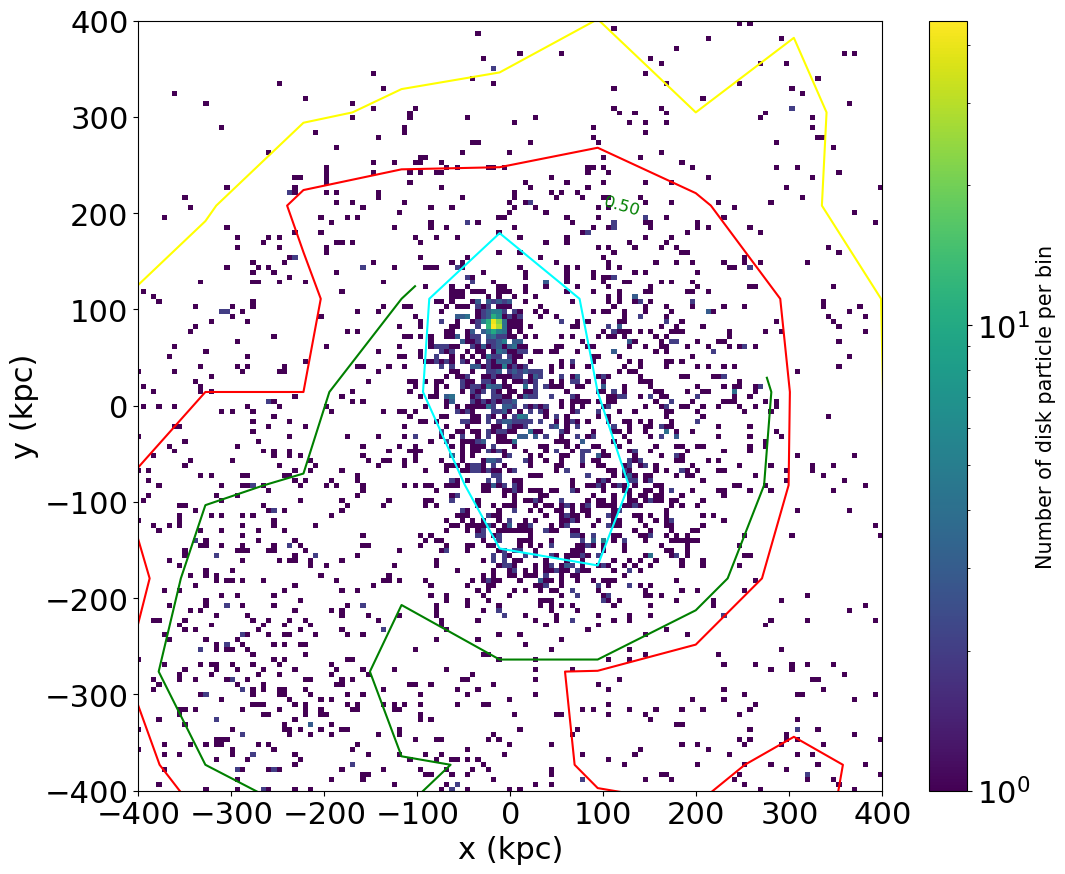

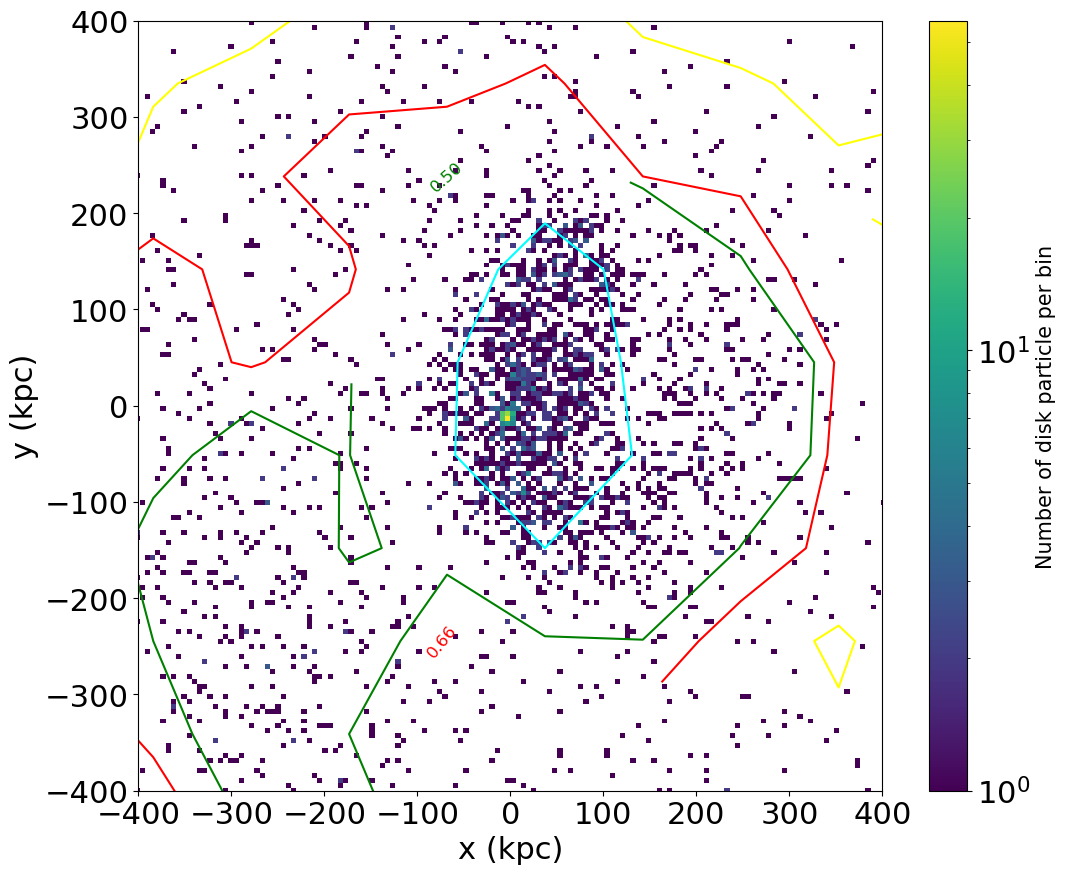

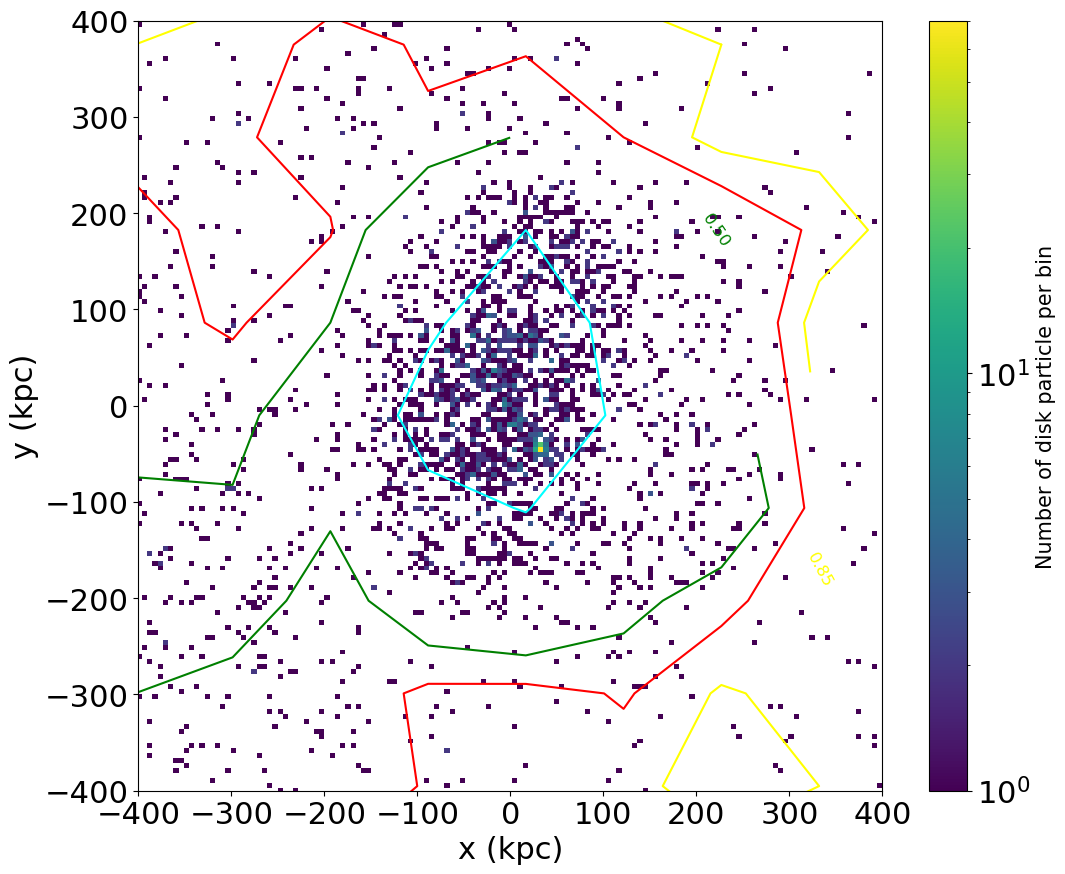

C:\Users\colin\ASTR400B\ASTR_400b\Research Assignments\Research Assignment 3\CenterOfMass.py:77: RuntimeWarning: invalid value encountered in scalar divide
  a_com = np.sum(a*m)/np.sum(m)
C:\Users\colin\ASTR400B\ASTR_400b\Research Assignments\Research Assignment 3\CenterOfMass.py:79: RuntimeWarning: invalid value encountered in scalar divide
  b_com = np.sum(b*m)/np.sum(m)
C:\Users\colin\ASTR400B\ASTR_400b\Research Assignments\Research Assignment 3\CenterOfMass.py:81: RuntimeWarning: invalid value encountered in scalar divide
  c_com = np.sum(c*m)/np.sum(m)


ValueError: autodetected range of [nan, nan] is not finite

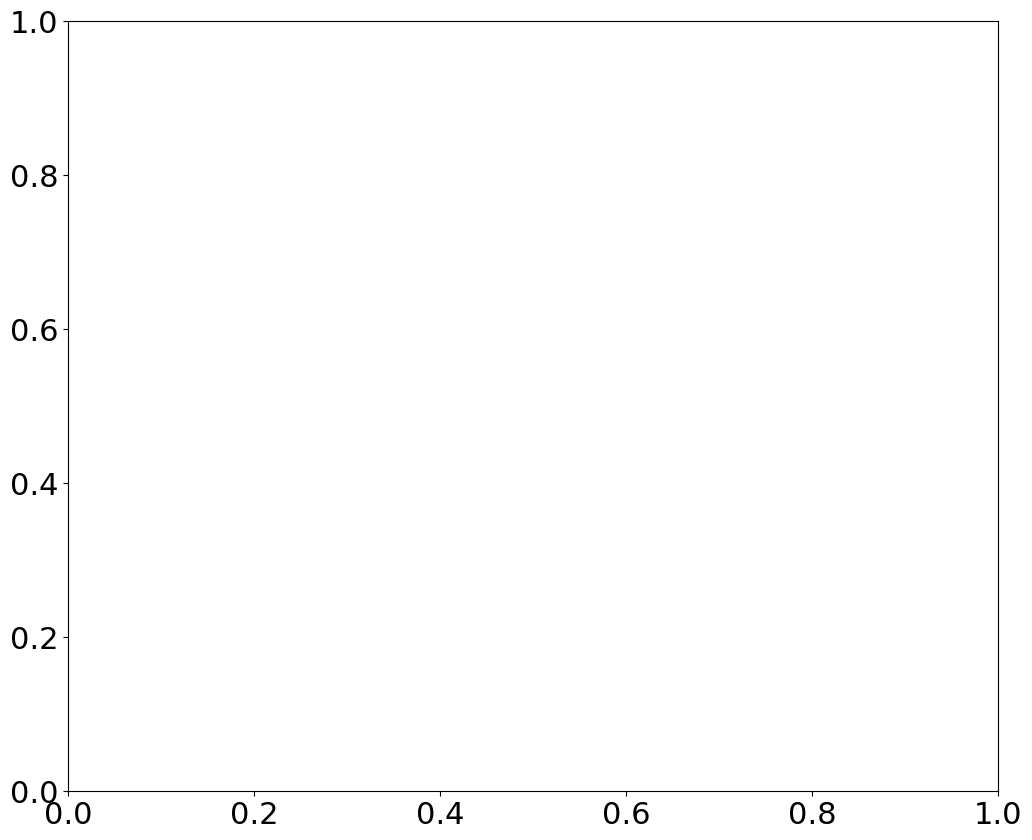

In [39]:
"""
Here I am running through all of the snapshots where M33 is at the apocenter of its orbit
"""
galaxy = 'M33'
for snap in apo_snaps:
    ilbl = '000' + str(snap)
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl+ '.txt'
    create_graph(filename,1)

In [ ]:
create_graph('M33_000.txt',1)
#create_graph('M33_000.txt')

In [27]:
# link elipticity 
# find semi major axis
# softening length, don't go smaller (~290 parsecs)
# look at MW and M31 merge specifically

In [42]:
def create_graph2(filename,ptype):
    """
    This function is meant to return values defined in create_graph
    """
    COMD = CenterOfMass(filename,ptype)
    COMP = COMD.COM_P(0.1)
    COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])
    # Determine positions of disk particles relative to COM 
    xD = COMD.x - COMP[0].value 
    yD = COMD.y - COMP[1].value 
    zD = COMD.z - COMP[2].value 

    # total magnitude
    rtot = np.sqrt(xD**2 + yD**2 + zD**2)

    # Determine velocities of disk particles relatiev to COM motion
    vxD = COMD.vx - COMV[0].value 
    vyD = COMD.vy - COMV[1].value 
    vzD = COMD.vz - COMV[2].value 

    # total velocity 
    vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)

    # Arrays for r and v 
    r = np.array([xD,yD,zD]).T # transposed 
    v = np.array([vxD,vyD,vzD]).T
    #graph(xD,yD)
    return r,v

In [32]:
#pos, vel = create_graph2('M33_525.txt',1)

In [44]:
def RotateFrame(posI,velI):
    """a function that will rotate the position and velocity vectors
    so that the disk angular momentum is aligned with z axis. 
    
    PARAMETERS
    ----------
        posI : `array of floats`
             3D array of positions (x,y,z)
        velI : `array of floats`
             3D array of velocities (vx,vy,vz)
             
    RETURNS
    -------
        pos: `array of floats`
            rotated 3D array of positions (x,y,z) 
            such that disk is in the XY plane
        vel: `array of floats`
            rotated 3D array of velocities (vx,vy,vz) 
            such that disk angular momentum vector
            is in the +z direction 
    """
    
    # compute the angular momentum
    L = np.sum(np.cross(posI,velI), axis=0)
    
    # normalize the angular momentum vector
    L_norm = L/np.sqrt(np.sum(L**2))


    # Set up rotation matrix to map L_norm to
    # z unit vector (disk in xy-plane)
    
    # z unit vector
    z_norm = np.array([0, 0, 1])
    
    # cross product between L and z
    vv = np.cross(L_norm, z_norm)
    s = np.sqrt(np.sum(vv**2))
    
    # dot product between L and z 
    c = np.dot(L_norm, z_norm)
    
    # rotation matrix
    I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    v_x = np.array([[0, -vv[2], vv[1]], [vv[2], 0, -vv[0]], [-vv[1], vv[0], 0]])
    R = I + v_x + np.dot(v_x, v_x)*(1 - c)/s**2

    # Rotate coordinate system
    pos = np.dot(R, posI.T).T
    vel = np.dot(R, velI.T).T
    
    return pos, vel


In [36]:
#pos, vel = create_graph2('M33_000.txt')

In [38]:
#m, t = data['m'],data['type']

In [238]:
def mass_prof(filename,ptype, graph):
    """
    This function implements create_graph2, and RotateFrame to do several different things
    This function is used to return the coordinates of a particle of a specific type
    This function also narrows down the list of particle masses to match the specific particle type selected
    finally, this function creates edge on and face on graphs for the galaxy depending on the input
    """
    time, total, data = Read(filename)
    pos, vel = create_graph2(filename,ptype)
    rn, vn = RotateFrame(pos,vel)
    if graph == 'yes':
        fig, ax= plt.subplots(figsize=(15, 10))

        # plot the particle density for M31 , 2D histogram
        # ADD HERE
        plt.hist2d(rn[:,0],rn[:,2], bins = 1500, norm = LogNorm(), cmap = "viridis")


        cbar = plt.colorbar()
        cbar.set_label("Number of disk particle per bin", fontsize=15)


        # Add axis labels
        plt.xlabel('x (kpc) ', fontsize=22)
        plt.ylabel('z (kpc)', fontsize=22)

        #set axis limits
        plt.ylim(-400,400)
        plt.xlim(-400,400)

        #adjust tick label font size
        label_size = 22
        matplotlib.rcParams['xtick.labelsize'] = label_size 
        matplotlib.rcParams['ytick.labelsize'] = label_size
        density_contour(rn[:,0],rn[:,2],80,80,ax = ax, colors=['yellow','red','green','cyan'])
        # Save to a file
        #plt.savefig('Lab7_EdgeOn_Density.png')

        # Rotated M31 Disk - FACE ON
        # Rotating about the z axis
        # M31 Disk Density 
        fig, ax= plt.subplots(figsize=(12, 10))

        # plot the particle density for M31 
        # ADD HERE
        plt.hist2d(rn[:,0],rn[:,1],norm = LogNorm(),bins = 1500,cmap = "viridis")
        cbar = plt.colorbar()
        cbar.set_label("Number of disk particle per bin", fontsize=15)

        # make the contour plot
        # x pos, y pos, contour res, contour res, axis, colors for contours.
        # ADD HERE

        # Add axis labels
        plt.xlabel(' x (kpc) ', fontsize=22)
        plt.ylabel(' y (kpc) ', fontsize=22)

        #set axis limits
        plt.ylim(-400,400)
        plt.xlim(-400,400)
        density_contour(rn[:,0],rn[:,1],80,80,ax = ax, colors=['yellow','red','green','cyan'])
        #adjust tick label font size
        label_size = 22
        matplotlib.rcParams['xtick.labelsize'] = label_size 
        matplotlib.rcParams['ytick.labelsize'] = label_size

        # Save to a file 
        #plt.savefig('Lab7_FaceOn_Density.png')
        plt.show()
    m, t = data['m'],data['type']
    index = np.where(t == ptype)
    mnew = []
    for i in index[0]:
        mnew.append(i)
    return (rn,m[mnew]) # changed from mnew
    


In [240]:
# need to add in the jacobi radius

def mass_profile(array, m, radii,direction):
    """
    This function creates an enclosed mass profile using cyindrical coordinates, as opposed to spherical
    This will help me determine the shape of the halo
    """
    d_value = []
    total_mass = []
    if direction == 'x':
        d = 0
    if direction == 'y':
        d = 1
    if direction == 'z':
        d = 2
    for i in radii[:,d]:
        d_value.append(i)
    d_value2 = np.array(np.abs(d_value))
    n = 0
    for R in array:
        within = np.where(d_value2<R)
        #print (d_value2)
        #print(m)
        #print(within)
        m2 = np.array(m)
        total_mass.append(np.sum(m2[within]))
        if n == 0:
            if np.sum(m2[within]) > np.sum(m)*(4/6):
                n = R
    return total_mass,n
    

In [242]:
#Radius = np.arange(0,30,.5)
#tm = mass_profile(Radius,mnew,rn,'x')
#print(tm)

In [480]:
# once again, add inn the jacobi radius

def MassProfileplt(array, m, radii):
        """
        Makes a plot of the cylyndrical mass profile for each axis
        Also calls out the radius where the cylander contains 2/3s of the total mass
        inputs:
            array: the array of radii
        """
        # defines each variable that needs to be plotted
        x = array
        y1, xn = mass_profile(array,m,radii,'x')
        y2, yn = mass_profile(array,m,radii,'y')
        y3, zn = mass_profile(array,m,radii,'z')
        plt.semilogy(x, y1, color='blue', 
         linewidth=5, label='x')
        plt.semilogy(x, y2, color='red', 
         linewidth=5, label='y')
        plt.semilogy(x, y3, color='green', 
         linewidth=5, label='y') # Changed from plt.plot to plt.semilogy
        plt.xlabel('Radius',fontsize = 22)
        plt.ylabel('Mass', fontsize = 22)
        plt.show()
        print (f"Hits 2/3s of total mass at radius {xn} along the x axis")
        print (f"Hits 2/3s of total mass at radius {yn} along the y axis")
        print (f"Hits 2/3s of total mass at radius {zn} along the z axis")
        #print (yn)
        #print (zn)
        

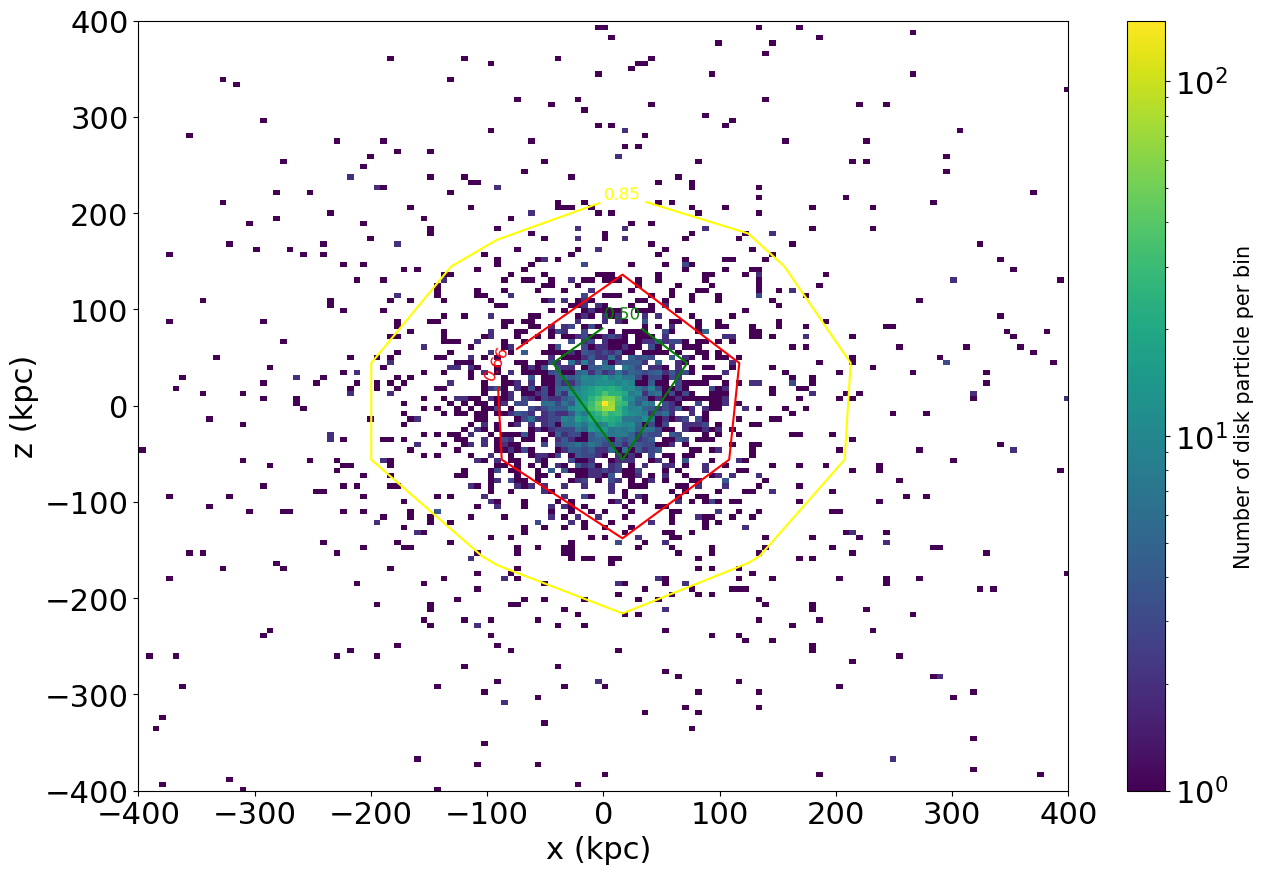

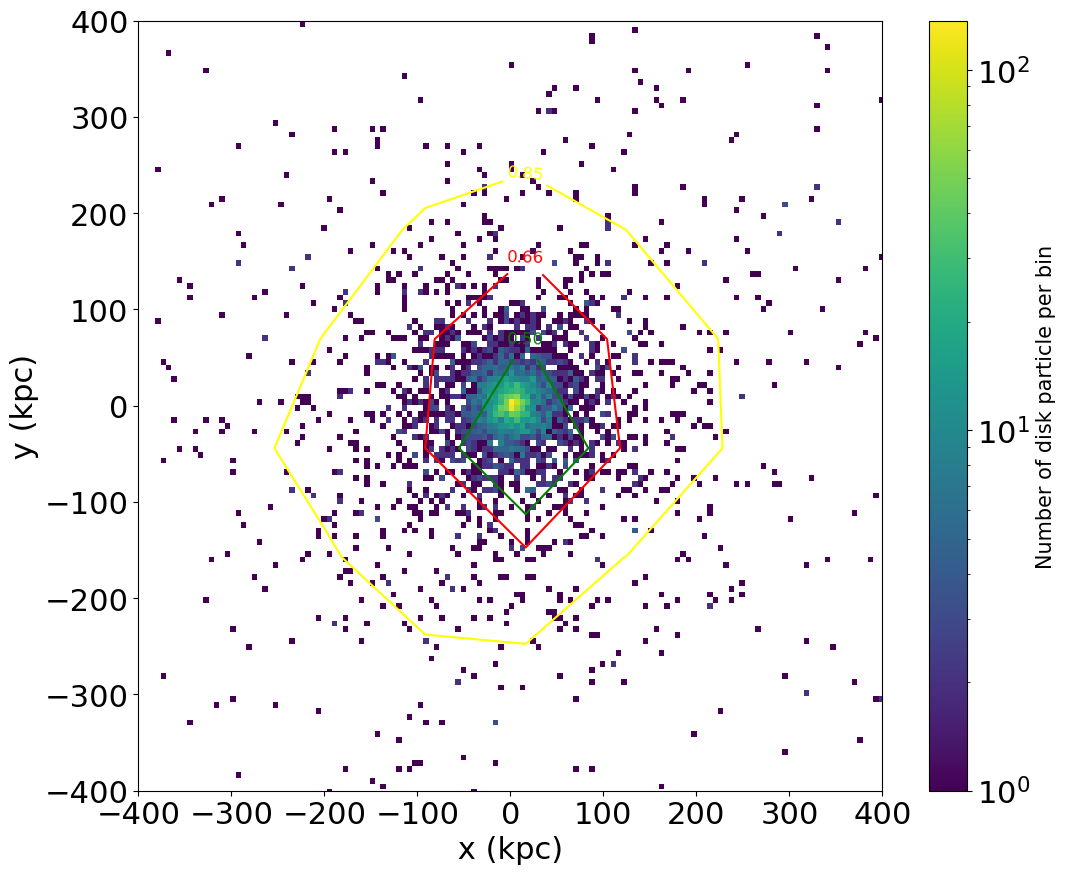

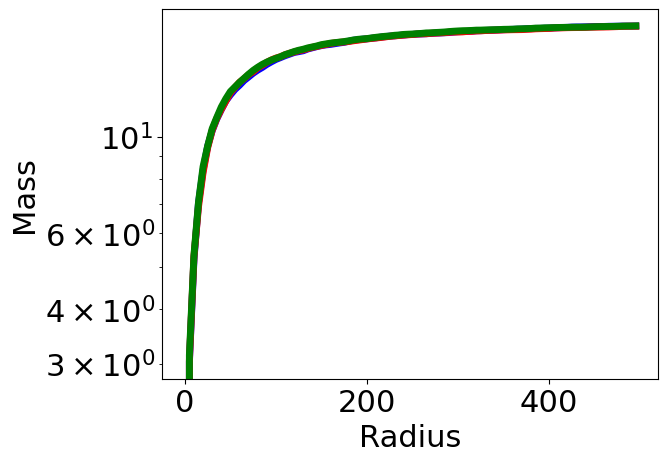

Hits 2/3s of total mass at radius 50 along the x axis
Hits 2/3s of total mass at radius 50 along the y axis
Hits 2/3s of total mass at radius 50 along the z axis


In [482]:
rn, mnew = mass_prof('M33_000.txt',1,'yes')
Radius = np.arange(0,500,5)
tm, rad = mass_profile(Radius,mnew,rn,'x')
mass_profiles = MassProfileplt(Radius,mnew,rn)

In [352]:
np.sqrt(1500)

38.72983346207417

M33_185.txt


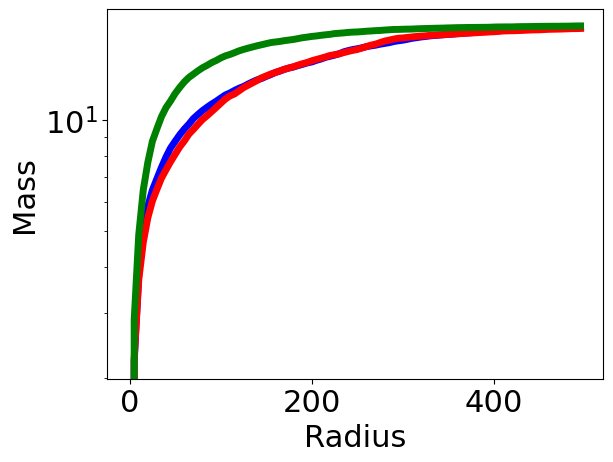

Hits 2/3s of total mass at radius 130 along the x axis
Hits 2/3s of total mass at radius 135 along the y axis
Hits 2/3s of total mass at radius 60 along the z axis
M33_380.txt


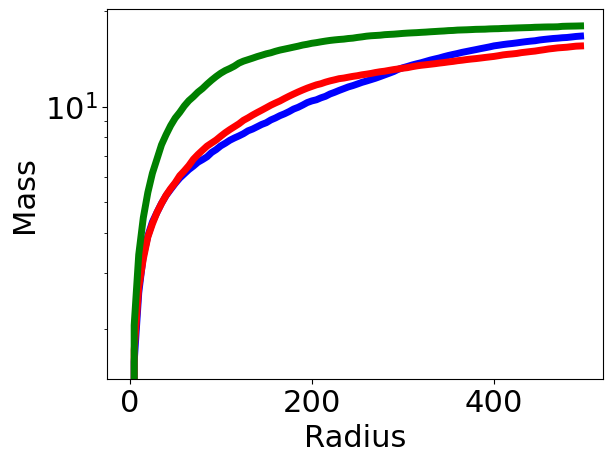

Hits 2/3s of total mass at radius 280 along the x axis
Hits 2/3s of total mass at radius 245 along the y axis
Hits 2/3s of total mass at radius 95 along the z axis
M33_525.txt


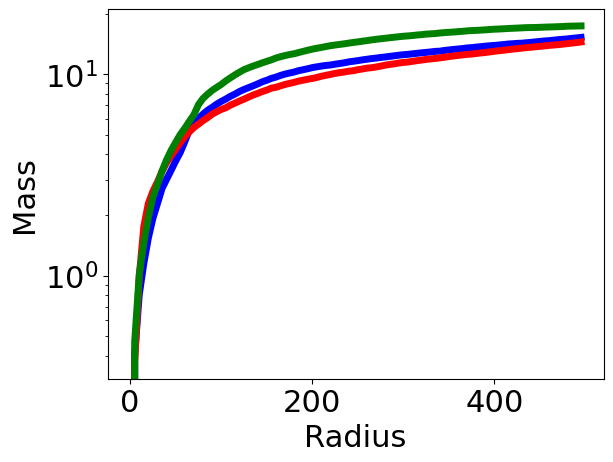

Hits 2/3s of total mass at radius 300 along the x axis
Hits 2/3s of total mass at radius 365 along the y axis
Hits 2/3s of total mass at radius 175 along the z axis
M33_625.txt


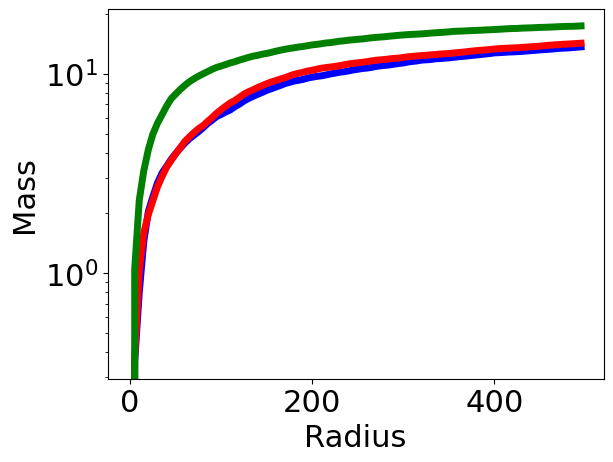

Hits 2/3s of total mass at radius 385 along the x axis
Hits 2/3s of total mass at radius 335 along the y axis
Hits 2/3s of total mass at radius 145 along the z axis
M33_705.txt


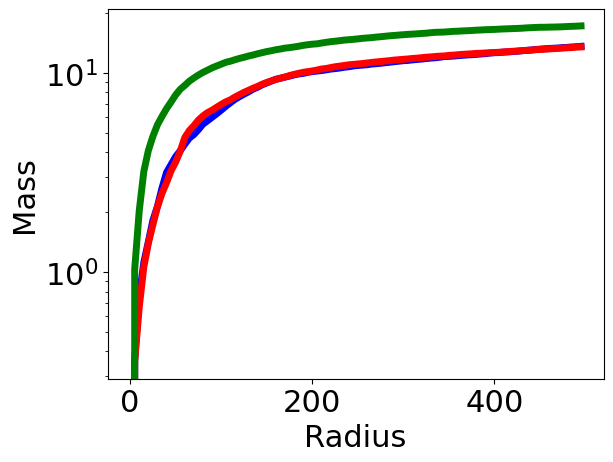

Hits 2/3s of total mass at radius 385 along the x axis
Hits 2/3s of total mass at radius 370 along the y axis
Hits 2/3s of total mass at radius 140 along the z axis
M33_775.txt


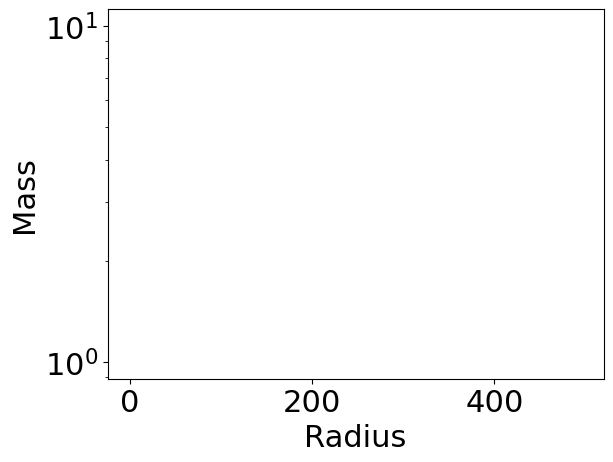

Hits 2/3s of total mass at radius 0 along the x axis
Hits 2/3s of total mass at radius 0 along the y axis
Hits 2/3s of total mass at radius 0 along the z axis


In [484]:
galaxy = 'M33'
for i in apo_snaps:
    ilbl = '000' + str(i)
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl+ '.txt'
    print (filename)
    rn, mnew = mass_prof(filename,1,'no')
    Radius = np.arange(0,500,5)
    tm, rad = mass_profile(Radius,mnew,rn,'x')
    mass_profiles = MassProfileplt(Radius,mnew,rn)

M33_065.txt


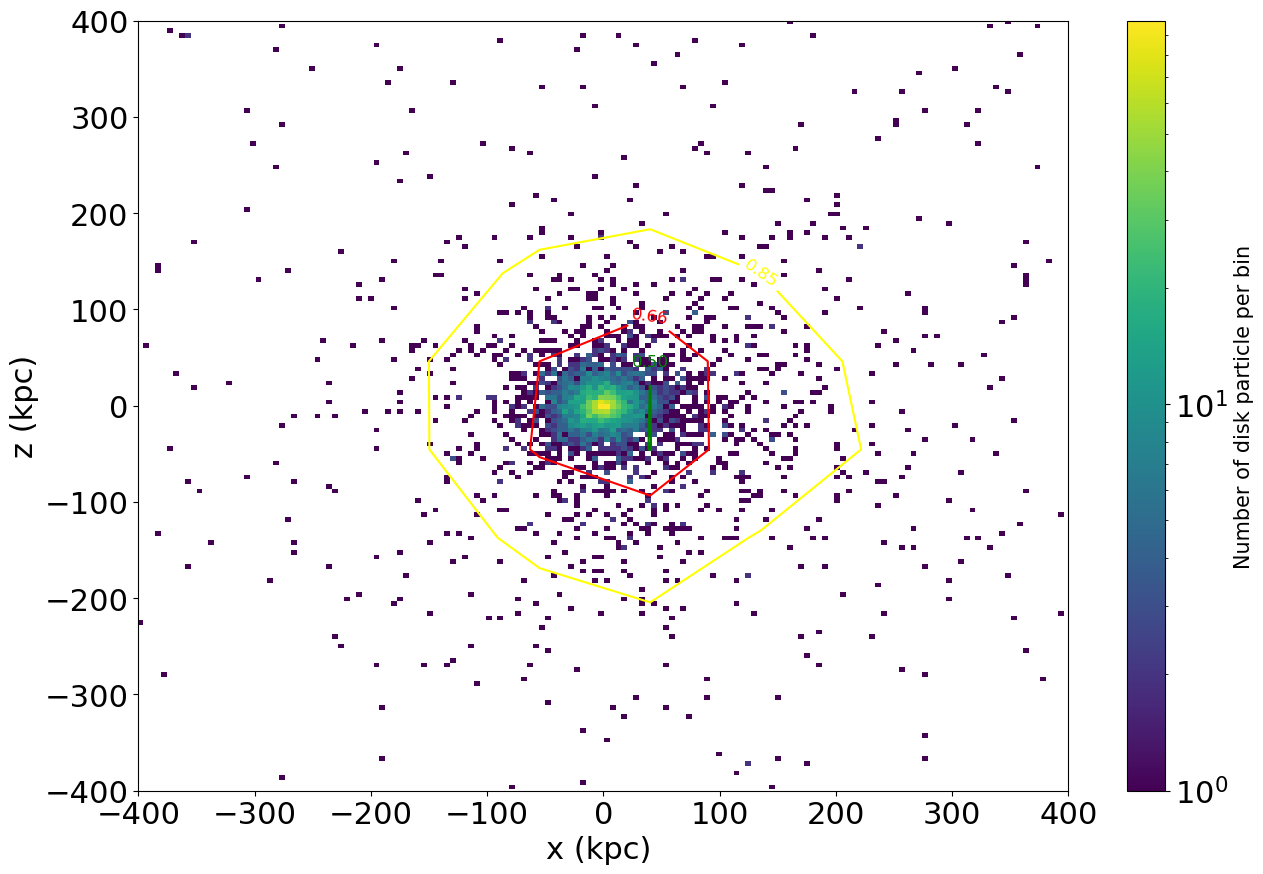

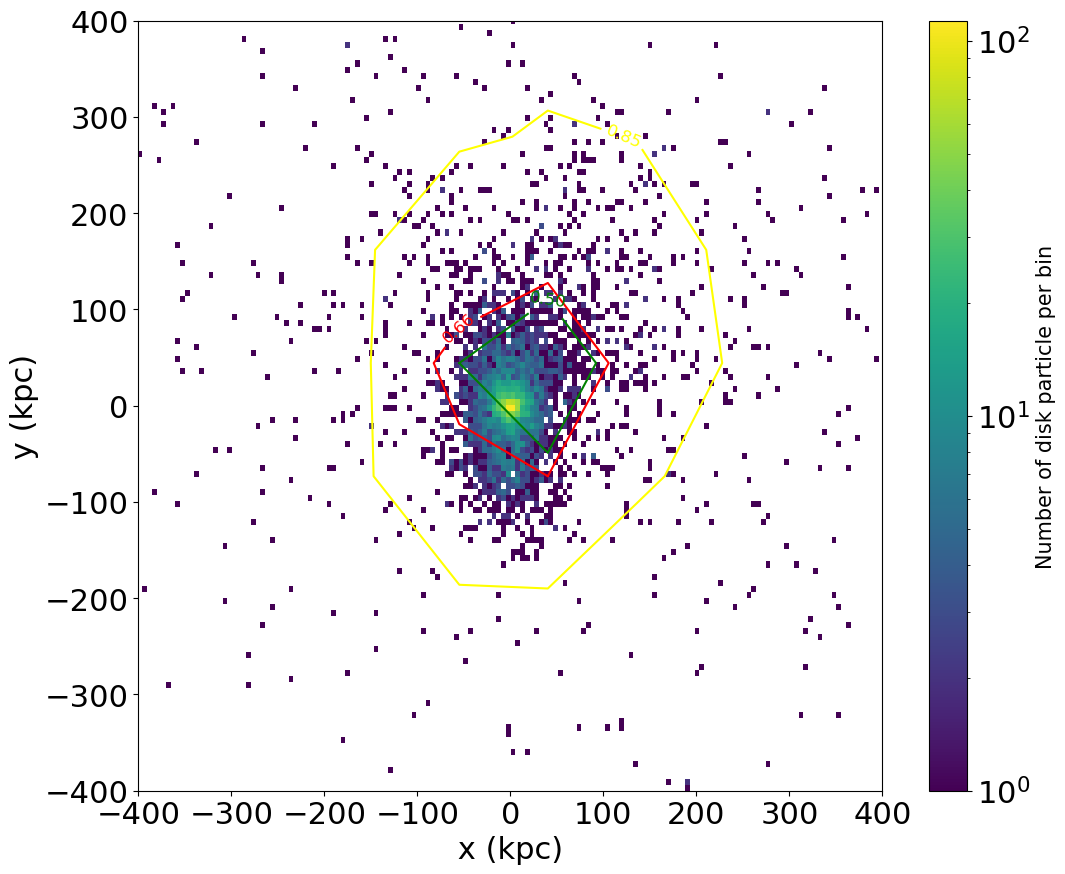

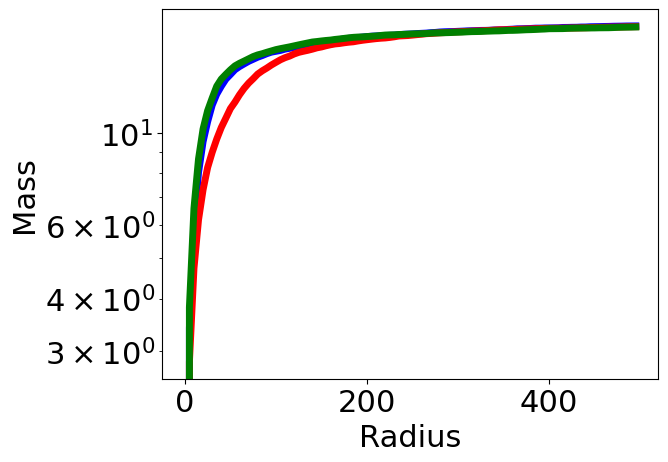

Hits 2/3s of total mass at radius 40 along the x axis
Hits 2/3s of total mass at radius 65 along the y axis
Hits 2/3s of total mass at radius 35 along the z axis
M33_300.txt


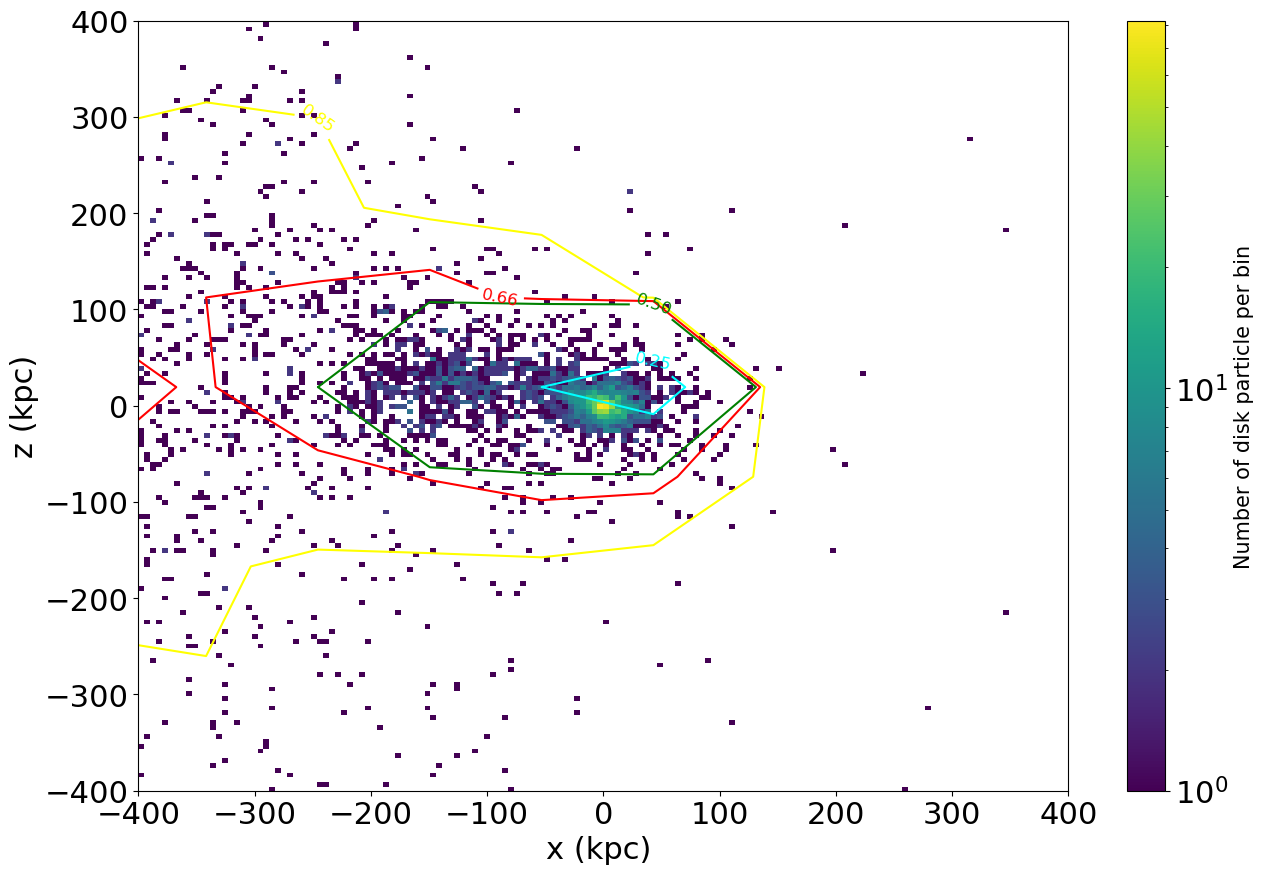

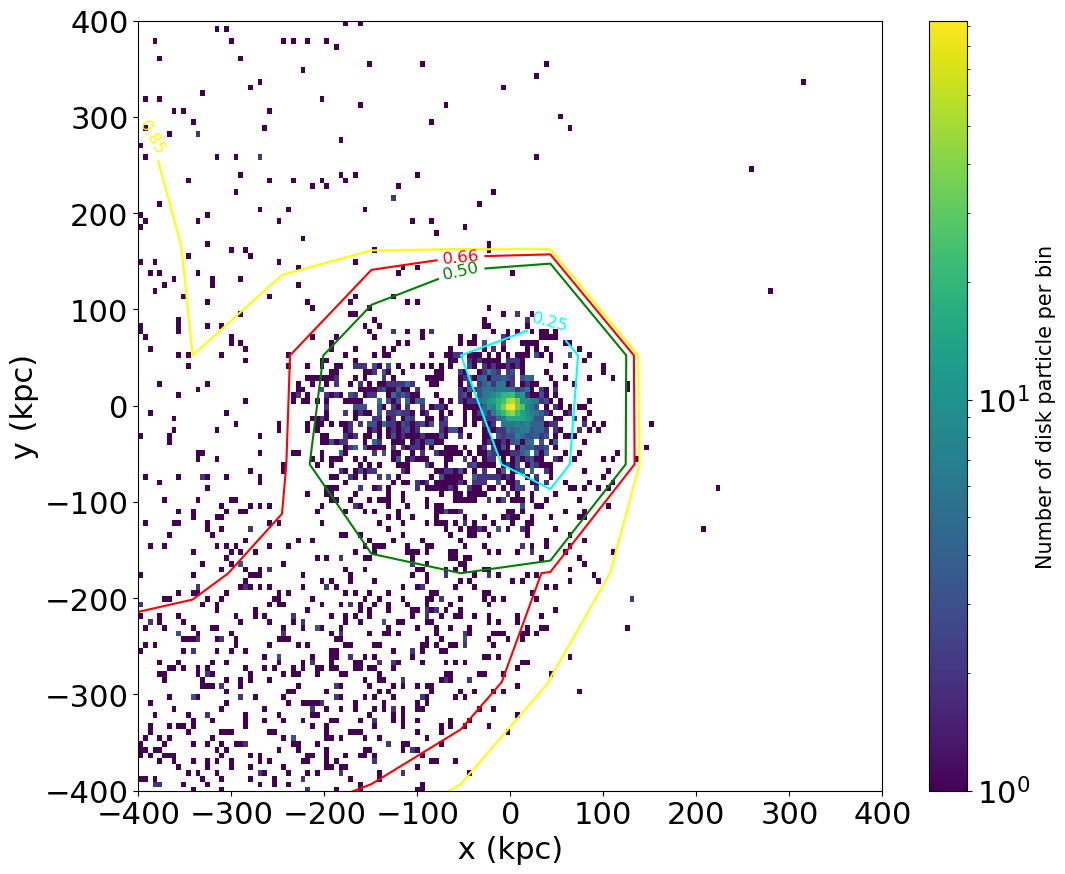

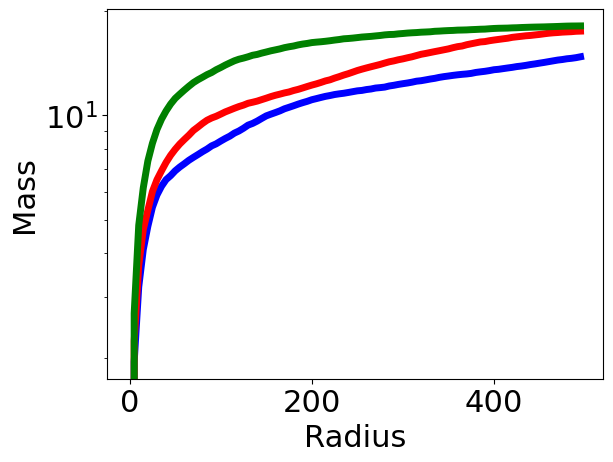

Hits 2/3s of total mass at radius 315 along the x axis
Hits 2/3s of total mass at radius 215 along the y axis
Hits 2/3s of total mass at radius 75 along the z axis
M33_470.txt


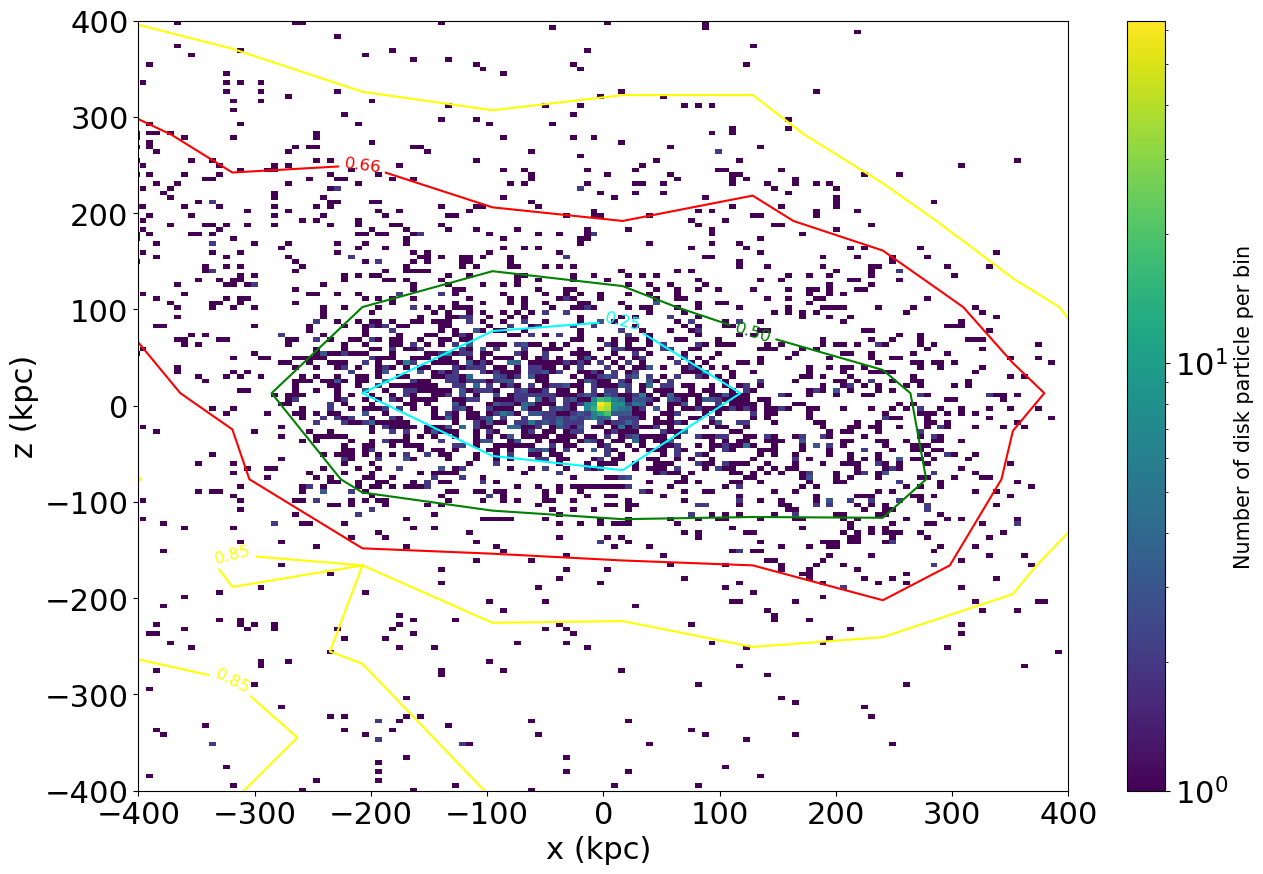

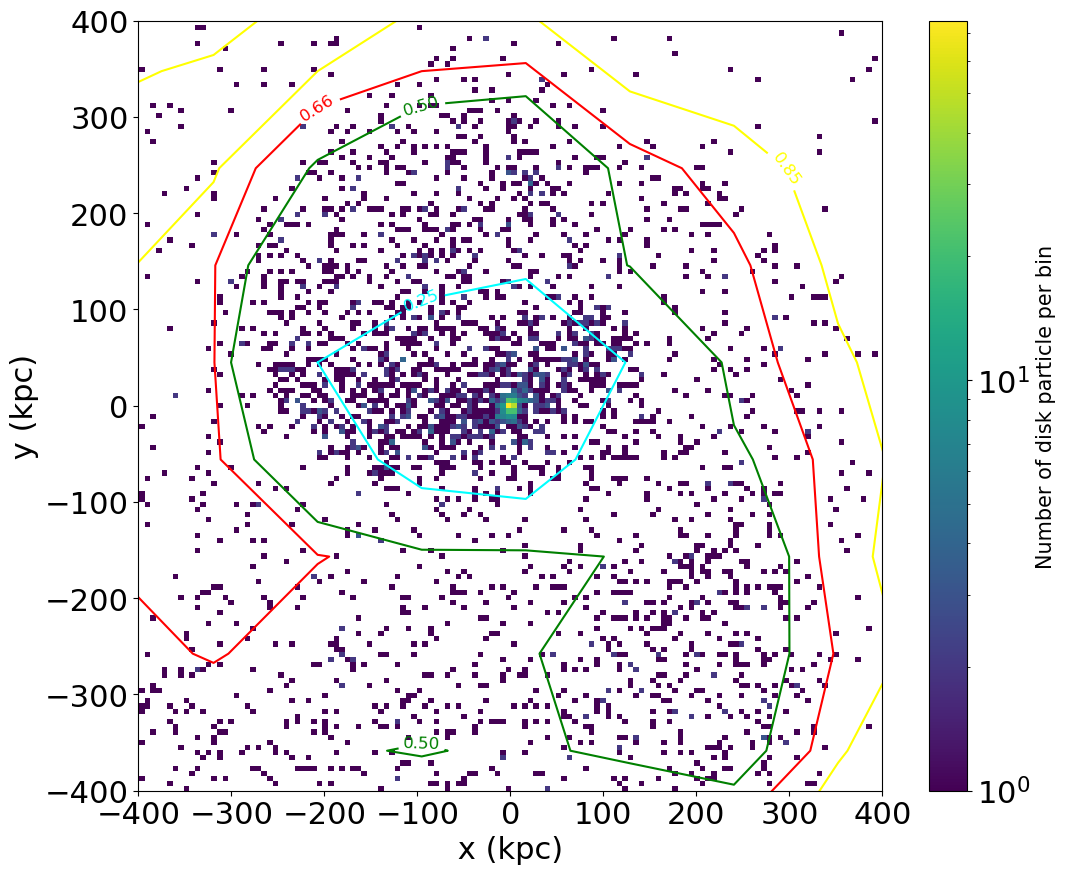

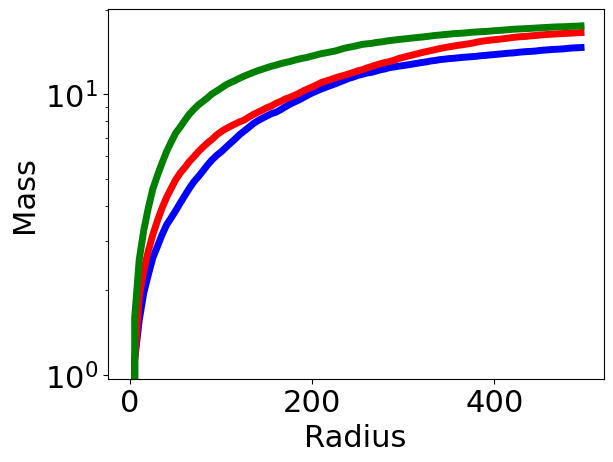

Hits 2/3s of total mass at radius 290 along the x axis
Hits 2/3s of total mass at radius 265 along the y axis
Hits 2/3s of total mass at radius 155 along the z axis
M33_580.txt


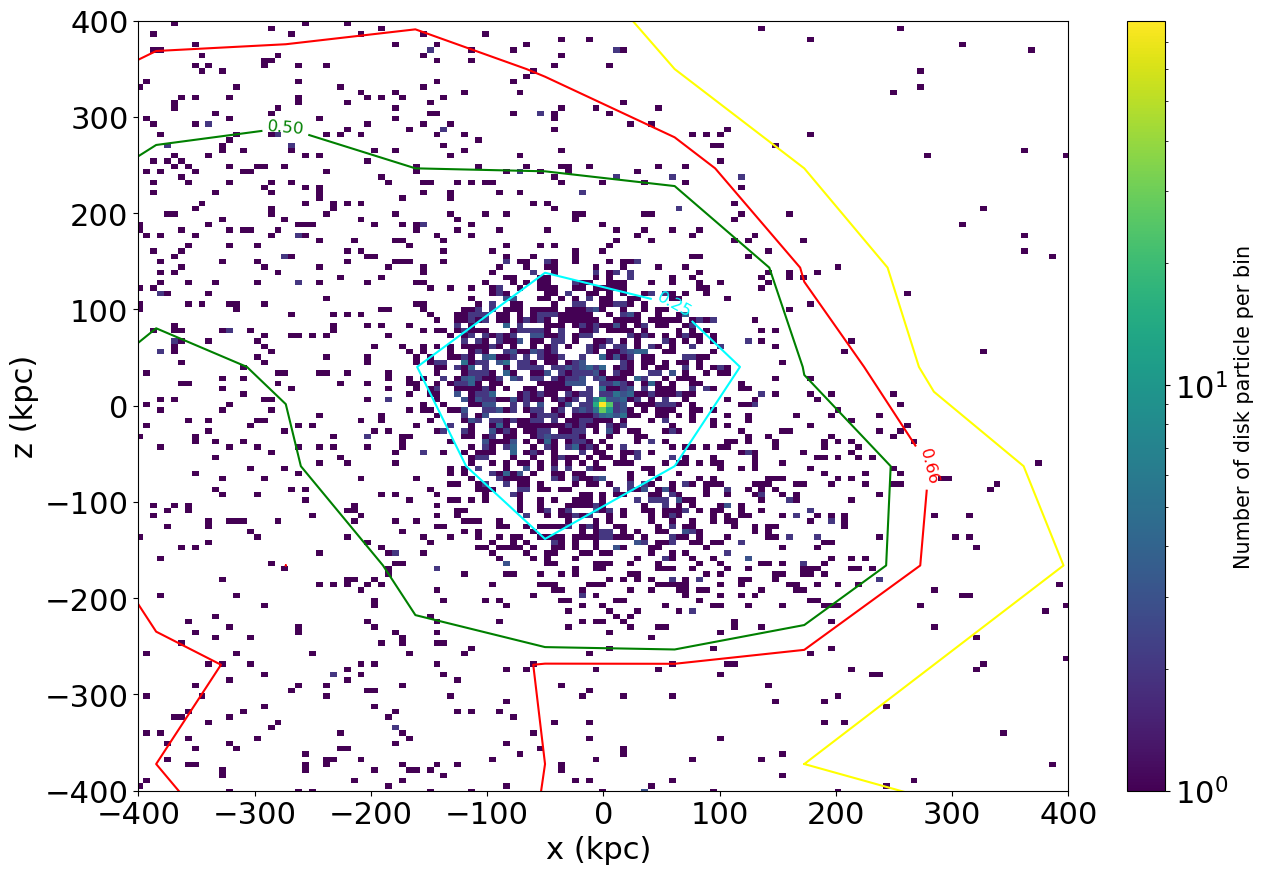

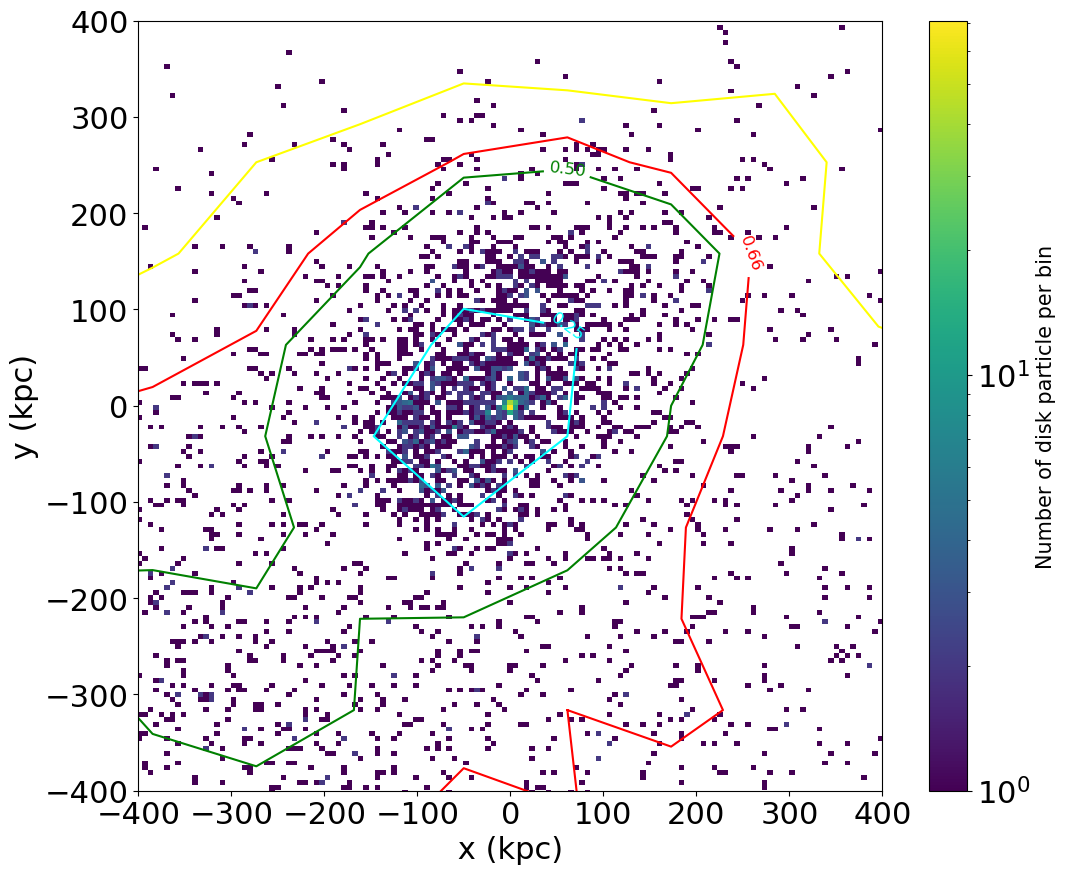

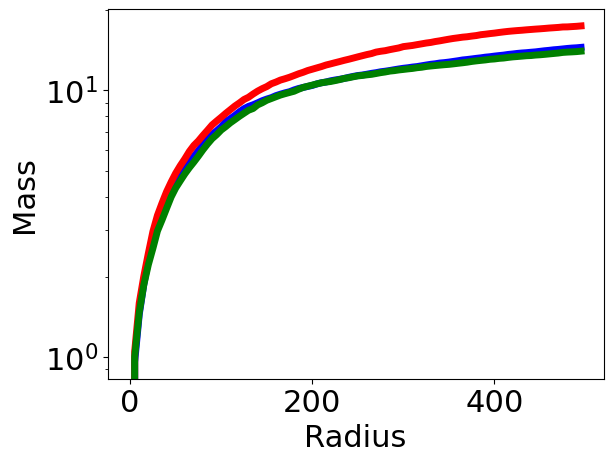

Hits 2/3s of total mass at radius 325 along the x axis
Hits 2/3s of total mass at radius 215 along the y axis
Hits 2/3s of total mass at radius 345 along the z axis
M33_670.txt


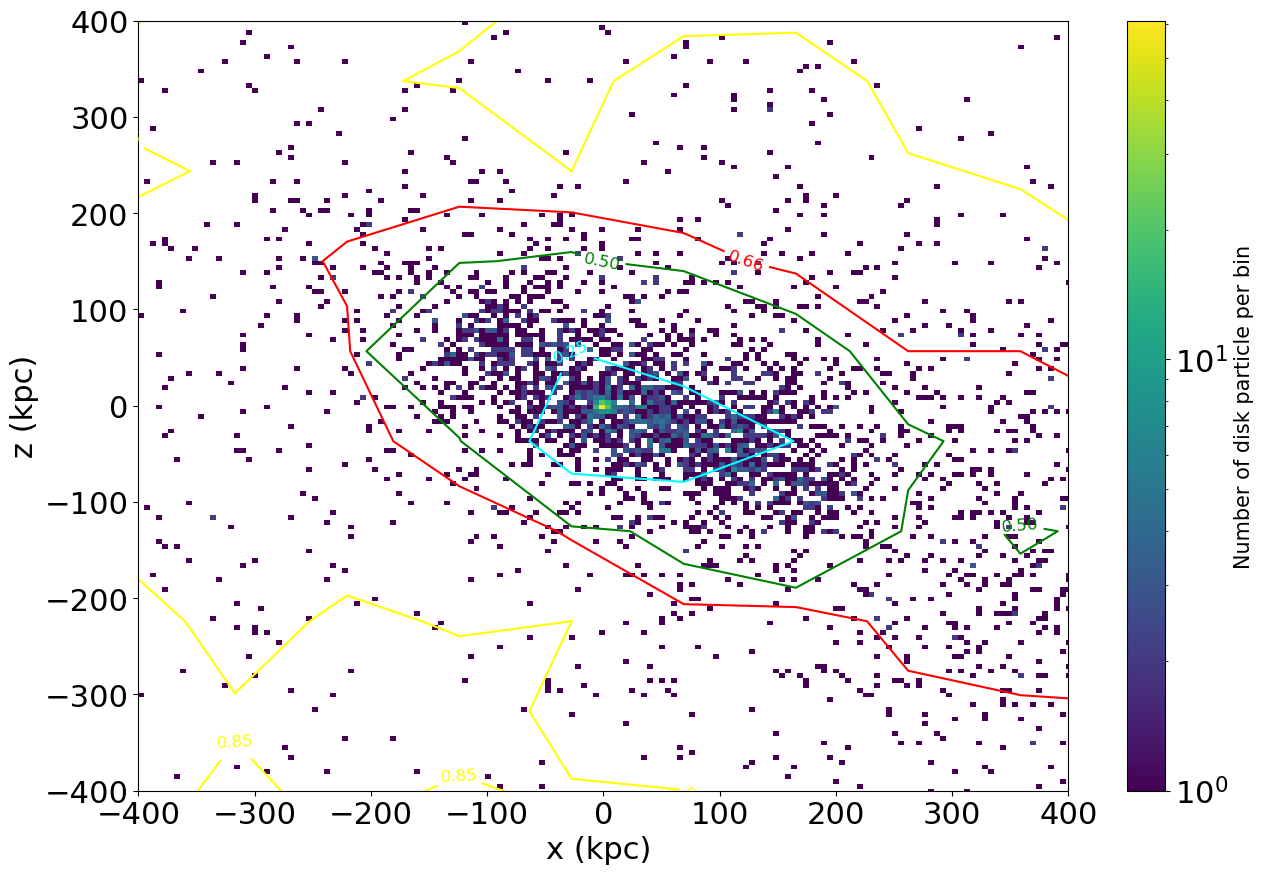

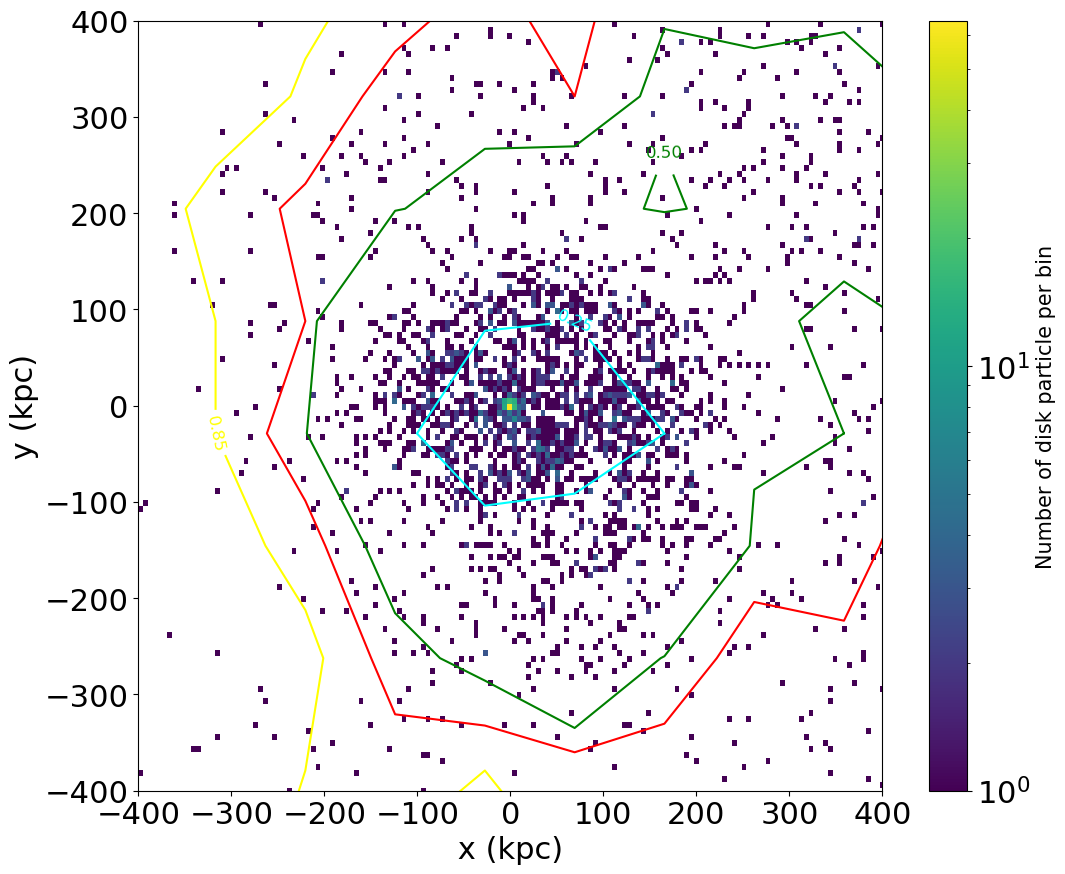

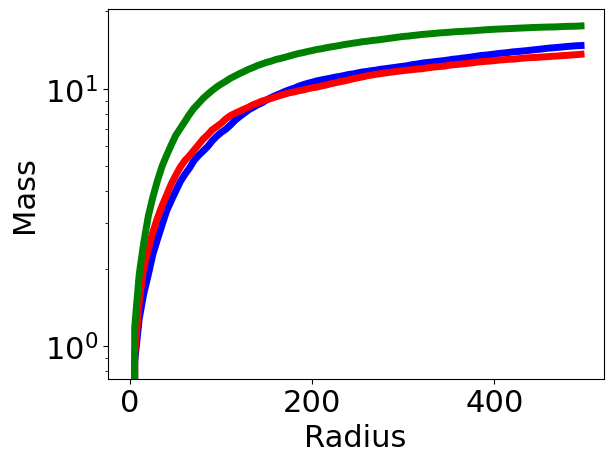

Hits 2/3s of total mass at radius 315 along the x axis
Hits 2/3s of total mass at radius 360 along the y axis
Hits 2/3s of total mass at radius 145 along the z axis
M33_740.txt


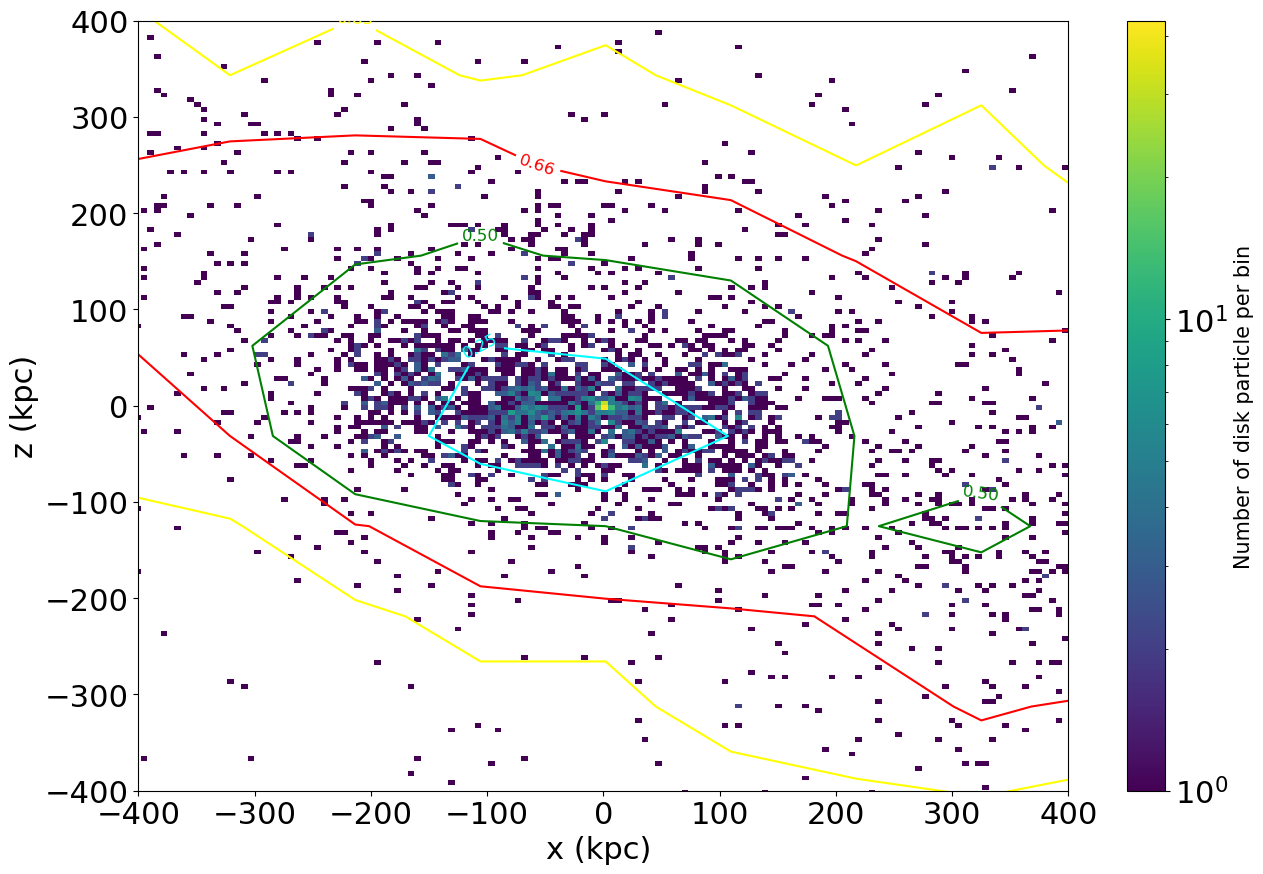

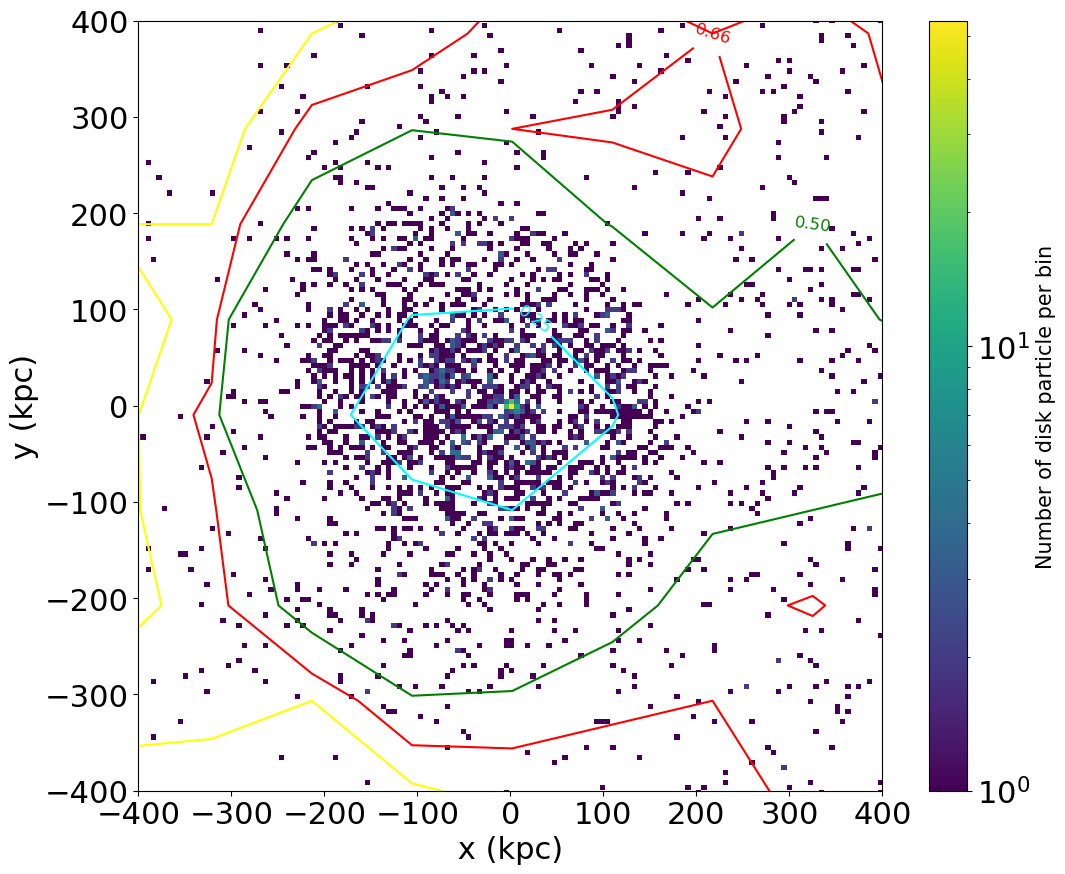

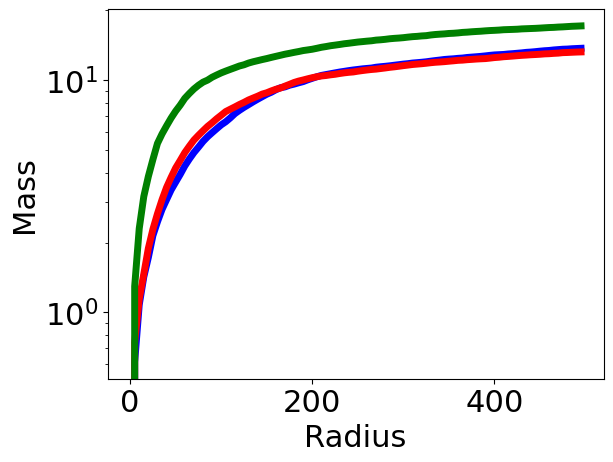

Hits 2/3s of total mass at radius 365 along the x axis
Hits 2/3s of total mass at radius 395 along the y axis
Hits 2/3s of total mass at radius 155 along the z axis


In [486]:
galaxy = 'M33'
for i in peri_snaps:
    ilbl = '000' + str(i)
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl+ '.txt'
    print (filename)
    rn, mnew = mass_prof(filename,1,'yes')
    Radius = np.arange(0,500,5)
    tm, rad = mass_profile(Radius,mnew,rn,'x')
    mass_profiles = MassProfileplt(Radius,mnew,rn)

In [272]:
test1 = np.where (rn[:,1] > 0)
test2 = np.where (rn[:,1] < 0)

In [274]:
print (len(test1[0]))
print (len(test2[0]))
print(test1)
print(test1)
print (rn[:,1][test1])

2429
2571
(array([   2,    4,    6, ..., 4994, 4996, 4999], dtype=int64),)
(array([   2,    4,    6, ..., 4994, 4996, 4999], dtype=int64),)
[  1.90854122  10.26709246 217.01143222 ...  67.05526495  49.81012803
  12.46116351]


In [276]:
"""
Create a new function using the outputs from mass prof to determine either the COM or the average particle length
(not sure which is best yet, will try both) to determine how the halo is streched out
It should be within an arbitrary distance
Can use jacobi radius from other part of project

"""
# This function doesn't work (rip)
def avg_particle(radii,mas,maxd):
    """
    radii: the list of radii that have already been rotated by rotate frame
    mass: the masses coresponding to the radii
    maxd: the maximum distance that I care about
    """
    
    mass = np.array(mas)
    #index = np.wherenp.sqrt(radi[0]**2+radi[1]**2+)
    # This part of the functin gets arrays of indexes for each of the 3 axis where they are larger and smaller than zero
    x_plusin = np.where((radii[:,0]>0) & (radii[:,0]<maxd))
    x_minusin = np.where((radii[:,0]<0) & (radii[:,0]>-maxd))
    y_plusin = np.where((radii[:,1]>0) & (radii[:,1]<maxd))
    y_minusin = np.where((radii[:,1]<0) & (radii[:,1]>-maxd))
    z_plusin = np.where((radii[:,2]>0) & (radii[:,2]<maxd))
    z_minusin = np.where((radii[:,2]<0) & (radii[:,2]>-maxd))
    # turns the indexes into actual values of the particles
    x_plus = radii[:,0][x_plusin]
    y_plus = radii[:,1][y_plusin]
    z_plus = radii[:,2][z_plusin]
    x_minus = radii[:,0][x_minusin]
    y_minus = radii[:,1][y_minusin]
    z_minus = radii[:,2][z_minusin]
    #dummy = np.array(x_plusin)[0]
    print (mass)
    # gets the mass of each particle in the created lists
    x_plusm = mass[x_plusin]
    y_plusm = mass[y_plusin]
    z_plusm = mass[z_plusin]
    x_minusm = mass[x_minusin]
    y_minusm = mass[y_minusin]
    z_minusm = mass[z_minusin]
    numxplus = []
    numxminus = []
    numyplus = []
    numyminus = []
    numzplus = []
    numzminus = []
    denxplus = []
    denxminus = []
    denyplus = []
    denyminus = []
    denzplus = []
    denzminus = []
    # COM equation for x_plus, x_minus, y_plus, y_minus, z_plus, zminus
    for i in range(len(x_plus)):
        numxplus.append(x_plus[i]*x_plusm[i])
        denxplus.append(x_plusm[i])
    for i in range(len(x_minus)):
        numxminus.append(x_minus[i]*x_minusm[i])
        denxminus.append(x_minusm[i])
    for i in range(len(y_plus)):
        numyplus.append(y_plus[i]*y_plusm[i])
        denyplus.append(y_plusm[i])
    for i in range(len(y_minus)):
        numyminus.append(y_minus[i]*y_minusm[i])
        denyminus.append(y_minusm[i])
    for i in range(len(z_plus)):
        numzplus.append(z_plus[i]*z_plusm[i])
        denzplus.append(z_plusm[i])
    for i in range(len(z_minus)):
        numzminus.append(z_minus[i]*z_minusm[i])
        denzminus.append(z_minusm[i])
    x_plus_COM = np.sum(numxplus)/np.sum(denxplus)
    x_minus_COM = np.sum(numxminus)/np.sum(denxminus)
    y_plus_COM = np.sum(numyplus)/np.sum(denyplus)
    y_minus_COM = np.sum(numyminus)/np.sum(denyminus)
    z_plus_COM = np.sum(numzplus)/np.sum(denzplus)
    z_minus_COM = np.sum(numzminus)/np.sum(denzminus)
    return x_plus_COM,x_minus_COM,y_plus_COM,y_minus_COM,z_plus_COM,z_minus_COM, x_plus,x_minus,y_plus,y_minus
    
        

In [356]:
print (len(Radius))

100


In [468]:
def mass_graph(radii,rad,x):
    grp = []
    grn = []
    for i in radii:
        radinp = np.where((rad[:,x]>0) & (rad[:,x]<i+2.5) & (rad[:,x]>i-2.5))
        valuesp = rad[radinp]
        grp.append(np.sum(valuesp))
        
        radinn = np.where((rad[:,x]<0) & (rad[:,x]>-i-2.5) & (rad[:,x]<-i+2.5))
        valuesn = rad[radinn]
        grn.append(np.sum(valuesn))
        grnf = np.abs(grn)
    #return len(radinp[0]),len(radinn[0])
    return grp,grnf

In [478]:
print (grn)

[-413.7654046400926, -3295.0058440977937, -229.1828148771486, -4775.918043279248, -111.52862658518677, -565.0304421353065, -893.2657994748951, -2290.8926824713153, -3634.564030580395, -2931.8917818454743, -359.72665761184976, -281.280888723425, -1540.0930106351595, 1666.1276662422515, 1335.468889665154, 1318.06591635364, 3361.039123836079, 137.24220118146494, 1877.0361389839238, -14.489176912428725, -2793.9615497405853, 2617.1513059216027, 1988.6448474059914, 2811.1034044722865, 2490.8624847223373, 3274.7440895478385, 346.1220252812327, -0.9938842169908639, -948.3398967992601, -373.31924284701427, -3194.23398870005, -1176.027886557725, -937.0174454260656, 5480.476581587484, -951.1063992779099, -3621.4230484646296, 791.5767650081355, -814.7021540362964, -546.9164888639249, -4905.190129022169, -2897.761837959615, -1072.5190060468972, 270.3718441441684, -665.7873332344266, -1534.1818524489277, -826.4821494746963, -1191.5346120829604, -1442.2151200038097, -2325.484892046863, 2740.254194534

In [432]:
list1 = [-1,-2]
print (np.abs(list1))

[1 2]


In [466]:
print (rn[:,0])
rad = rn
i = 5
radinp = np.where((rad[:,0]<0) & (rad[:,0]>-i-2.5) & (rad[:,0]<-i+2.5))
print (radinp)
print (len(radinp[0]))
print (Radius)
print (rn[radinp])

[-4.62301694e+02 -1.51307698e+03 -6.15199373e-01 ... -2.03040546e+03
  2.02654236e+02 -8.43445257e+01]
(array([  58,  180,  189,  389,  596,  734,  809,  859,  947, 1000, 1136,
       1204, 1214, 1230, 1350, 1372, 1388, 1470, 1475, 1597, 1759, 1864,
       1911, 2165, 2199, 2216, 2338, 2542, 2594, 2676, 2699, 2712, 2720,
       2745, 2814, 2854, 2885, 2950, 2961, 3073, 3151, 3193, 3297, 3325,
       3409, 3447, 3703, 3795, 3808, 3960, 4083, 4116, 4274, 4536, 4622,
       4628, 4653, 4697, 4749, 4827, 4956], dtype=int64),)
61
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455 460 465 470 475 480 485 490 495]
[[-3.76417424e+00  1.13609824e+02  2.08614213e+01]
 [-3.097335

In [476]:
grn,grp = mass_graph(Radius,rn,0)

In [462]:
print (grp)
print (grn)

3
6


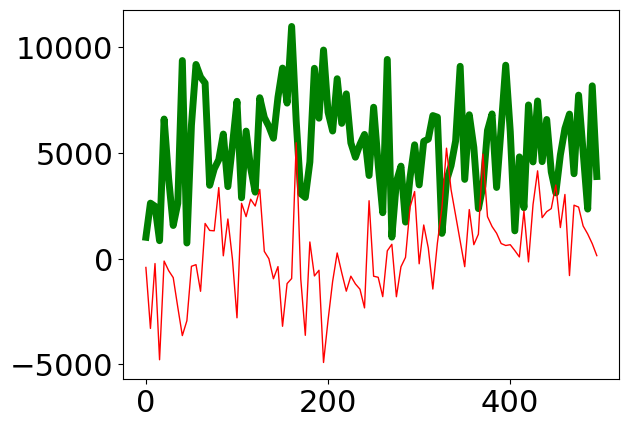

In [472]:
plt.plot(Radius, grp, color='green', 
         linewidth=5)
plt.plot(Radius, grn, color='red', 
         linewidth=1)
plt.show()

In [278]:
print (mnew)

[0.00373226 0.00373226 0.00373226 ... 0.00373226 0.00373226 0.00373226]


In [306]:
xplus, xminus, yplus, yminus, zplus, zminus, xplus2, xminus2, yplus2, yminus2 = avg_particle(rn,mnew,300)

[0.00373226 0.00373226 0.00373226 ... 0.00373226 0.00373226 0.00373226]


In [308]:
print (f"xplus:{xplus}")
print (f"xminus:{xminus}")
print (f"yplus:{yplus}")
print (f"yminus:{yminus}")
print (f"zplus:{zplus}")
print (f"zminus:{zminus}")

xplus:98.83421623198022
xminus:-104.81153629041691
yplus:89.93286250639066
yminus:-99.29065748188683
zplus:84.19112319642474
zminus:-73.77736493727441


In [304]:
print ((xplus+xminus)/(len(xminus2)+len(xplus2)))

0.0029618502347492754


In [348]:
test4 = np.where ((rn[:,0] >100) & (rn[:,0]<300))
test5 = np.where ((rn[:,0] <-100) & (rn[:,0]>-300))
test6 = np.where ((rn[:,1] >100) & (rn[:,1]<300))
test7 = np.where ((rn[:,1] <-100) & (rn[:,1]>-300))
test8 = np.where ((rn[:,2] >100) & (rn[:,2]<300))
test9 = np.where ((rn[:,2] <-100) & (rn[:,2]>-300))

In [350]:
print (len(test4[0]))
print (len(test5[0]))
print (len(test6[0]))
print (len(test7[0]))

601
822
572
631


In [346]:
print (len(test4[0]))

645


In [284]:
print (len(xplus2))
print (len(yplus2))
print( len(xminus2))
print (len(yminus2))
#print (len(zplus2))

1669
1983
1124
1119


In [286]:
xp = 0
for i in xplus2:
    xp = xp + i
print(xp/len(xplus2))
xm = 0
for i in xminus2:
    xm = xm + i
print(xm/len(xminus2))

73.56872550960333
-48.38319895135687


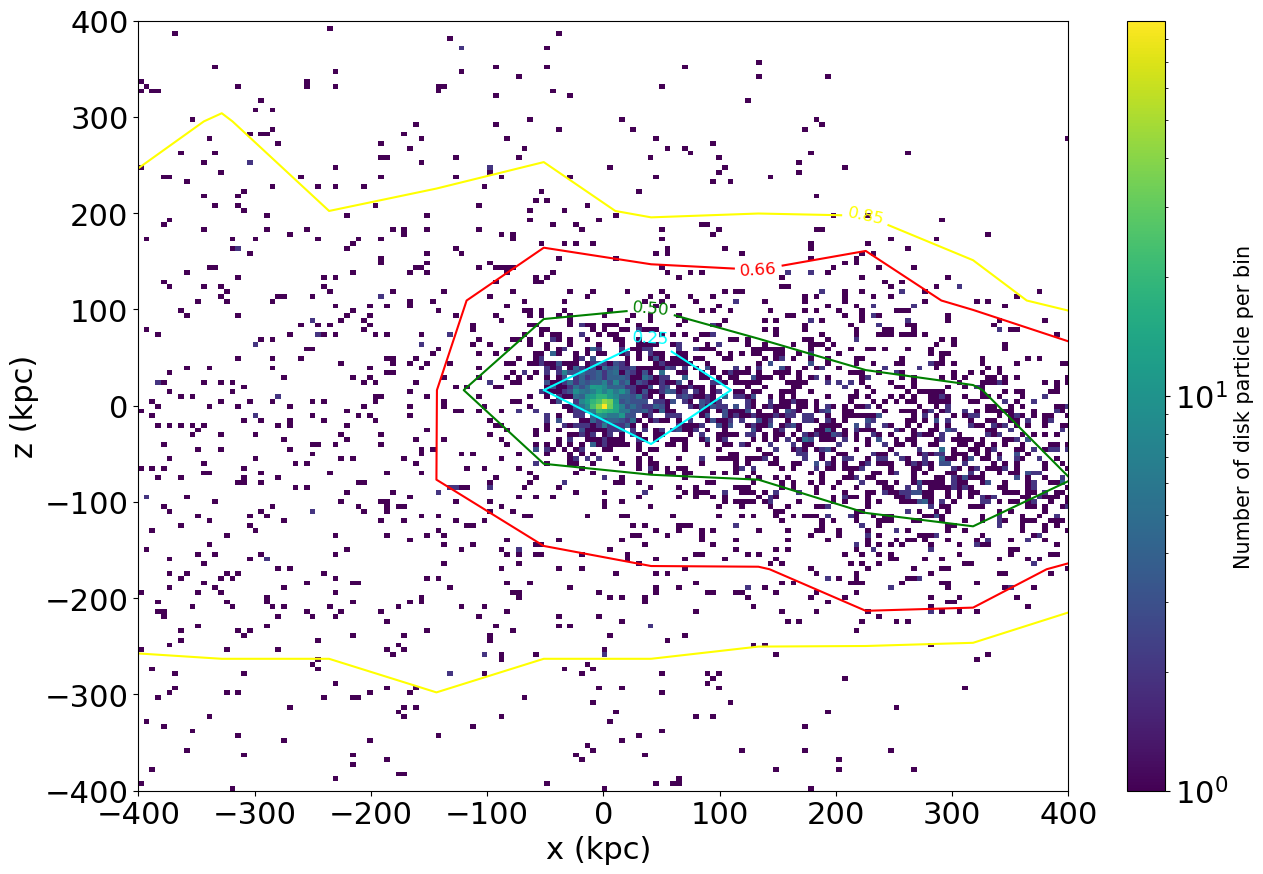

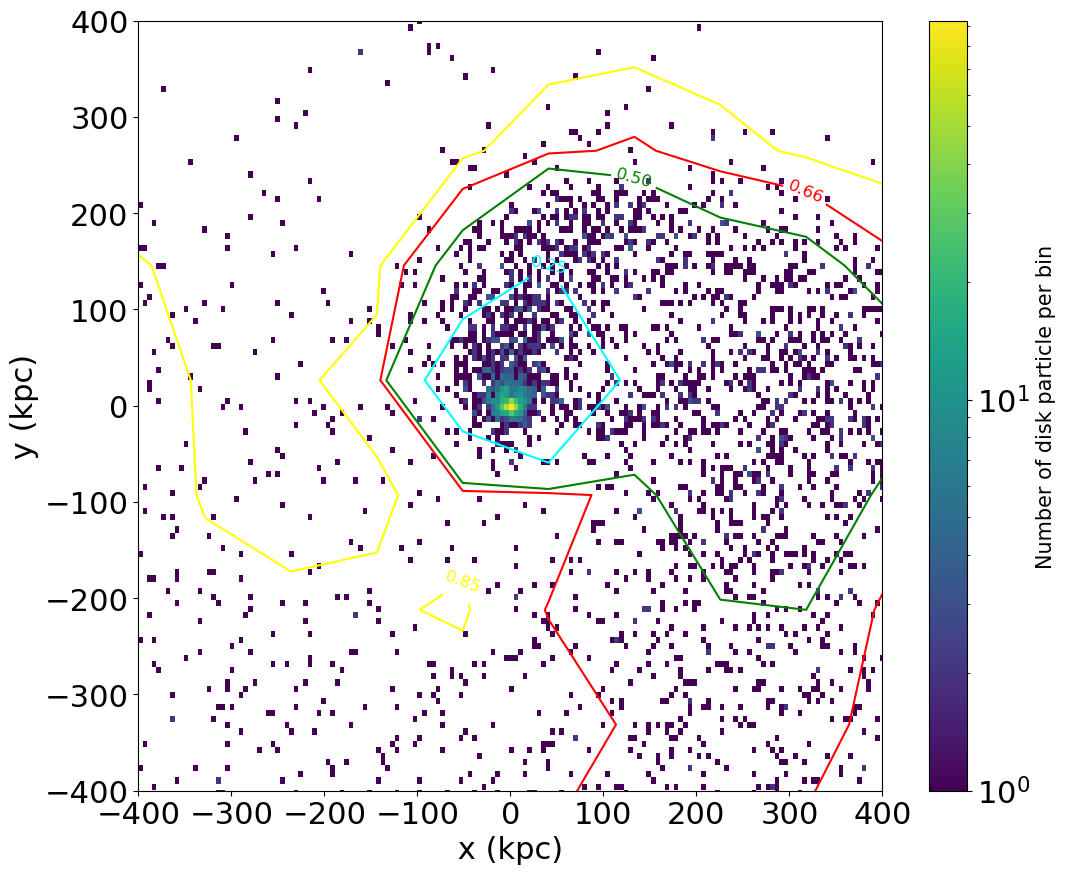

(array([[ 5.39281087e+01, -6.72668708e+02,  1.15142360e+02],
        [-4.20426170e+02, -7.51973524e+02,  1.07974614e+01],
        [ 1.98681898e-01,  1.90854122e+00, -9.80797409e-01],
        ...,
        [-7.21122032e+02, -1.06532750e+03, -1.36690625e+03],
        [ 3.79017666e+02, -2.10404242e+01, -5.93419458e+01],
        [-1.04648798e+01,  1.24611635e+01, -1.38380081e+00]]),
 array([0.00373226, 0.00373226, 0.00373226, ..., 0.00373226, 0.00373226,
        0.00373226]))

In [298]:
mass_prof('M33_380.txt',1,'yes')

In [ ]:
def avg_particle(radii,mass,maxd,vector):
    if vector = "x"

In [156]:
list1 = np.array([1,2,3,4])
list2 = np.array([5,1,5,1])
index = np.where(list1<list2)
index2 = np.all (2<list2 and list2<4)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
print(index)

(array([0, 2], dtype=int64),)


In [13]:
print(list1[index])

[1 3]


In [76]:
print(rn)

[[ -8.18959946  -6.51143687  -9.70962556]
 [  5.29679346 -11.12876893   3.49510589]
 [ 12.29142399  -6.07988648   5.40156512]
 ...
 [  2.74585661   7.37536914   2.9750737 ]
 [  6.1144748    8.92292005   0.83062069]
 [  7.96321956  15.99791525  -0.08925142]]


In [488]:
print (apo_snaps)

[185 380 525 625 705 775]


In [490]:
print (peri_snaps)

[ 65 300 470 580 670 740]


In [492]:
print (mid_snaps)

[125 240 340 425 500 550 600 650 690 720 760]


In [494]:
snaps = [000, 300, 340, 380, 705, 780]

In [496]:
print (snaps)

[0, 300, 340, 380, 705, 780]


M33_000.txt


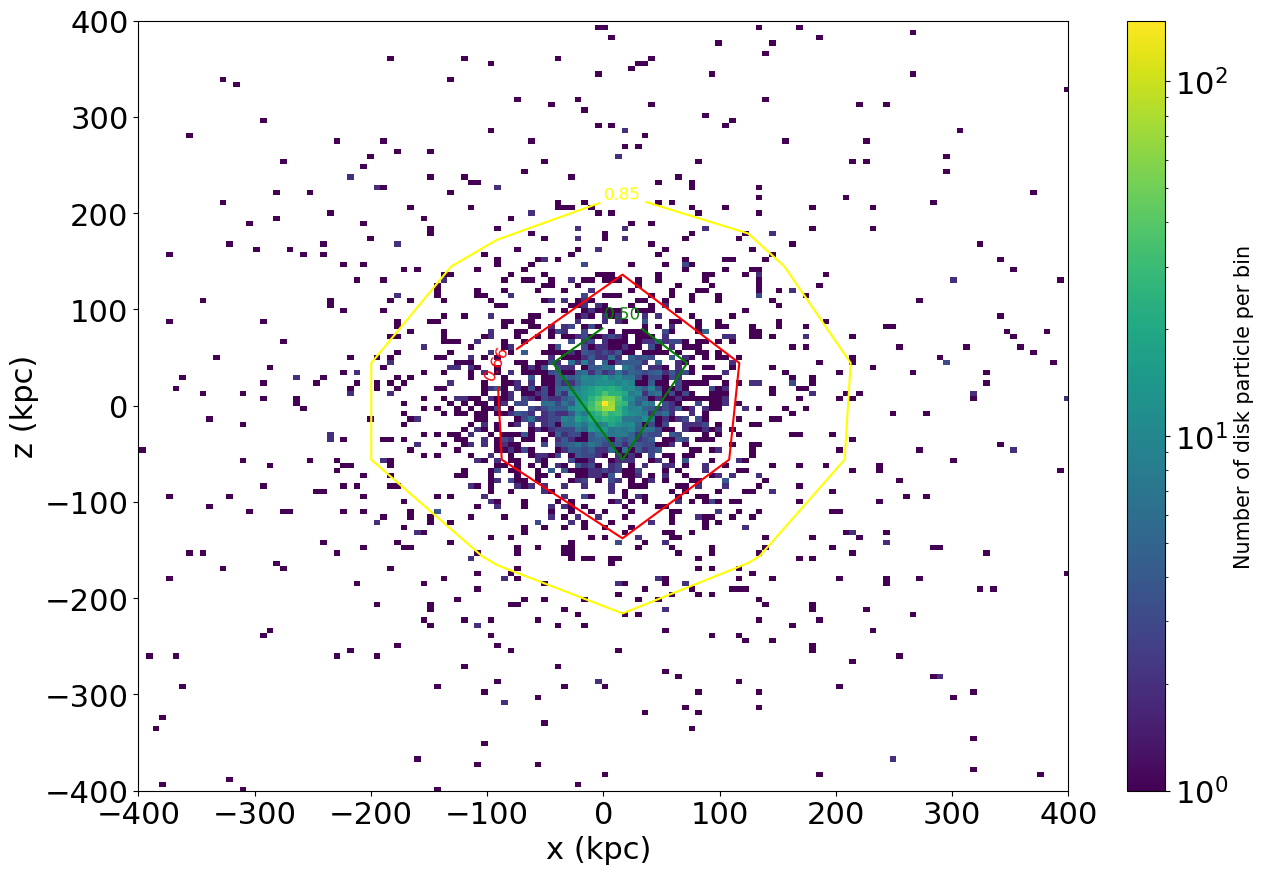

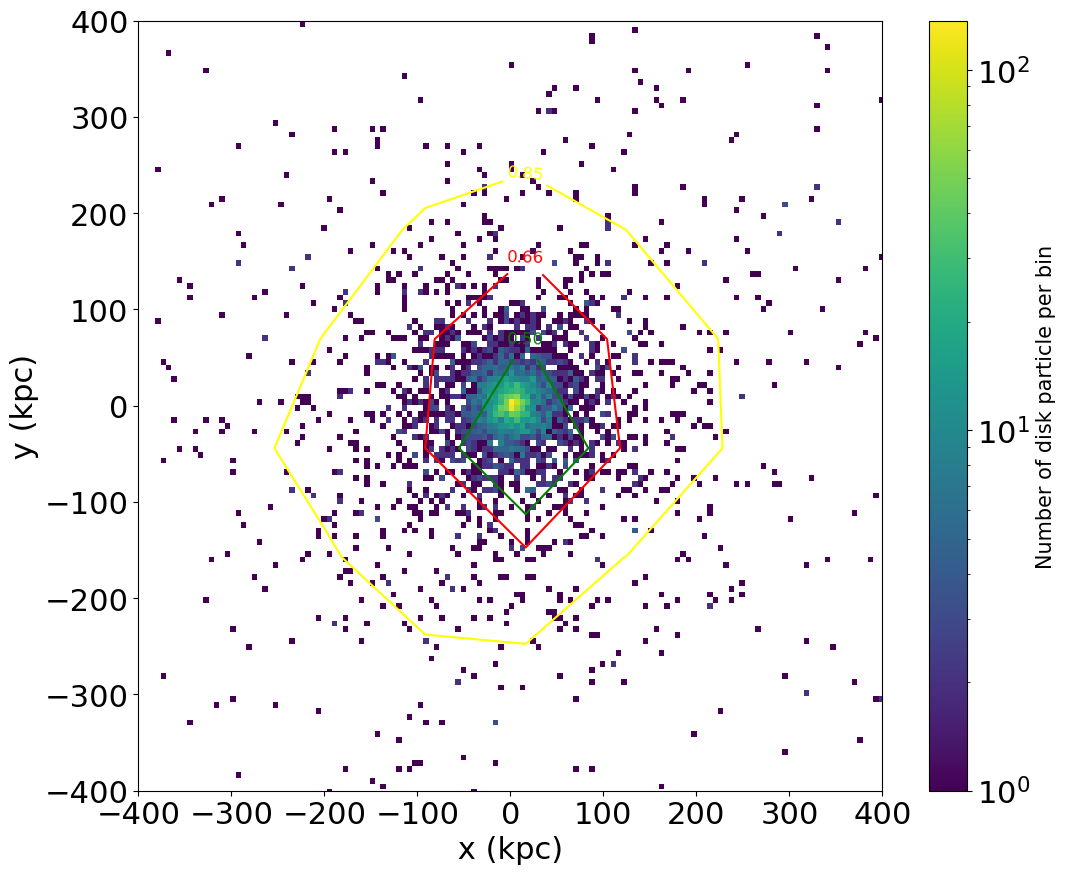

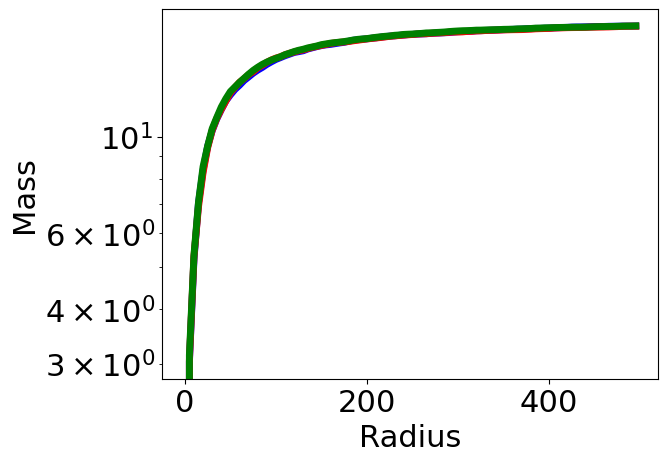

Hits 2/3s of total mass at radius 50 along the x axis
Hits 2/3s of total mass at radius 50 along the y axis
Hits 2/3s of total mass at radius 50 along the z axis
M33_300.txt


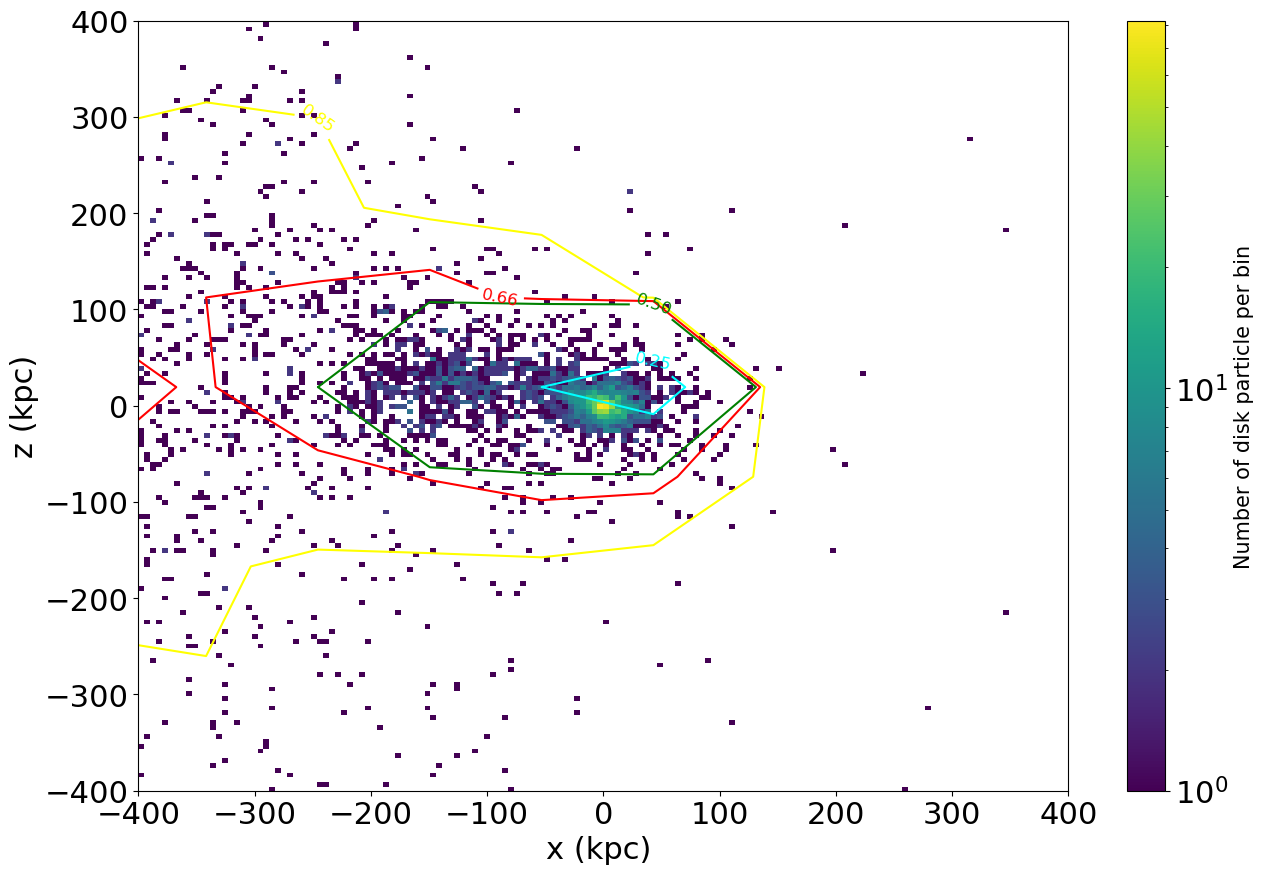

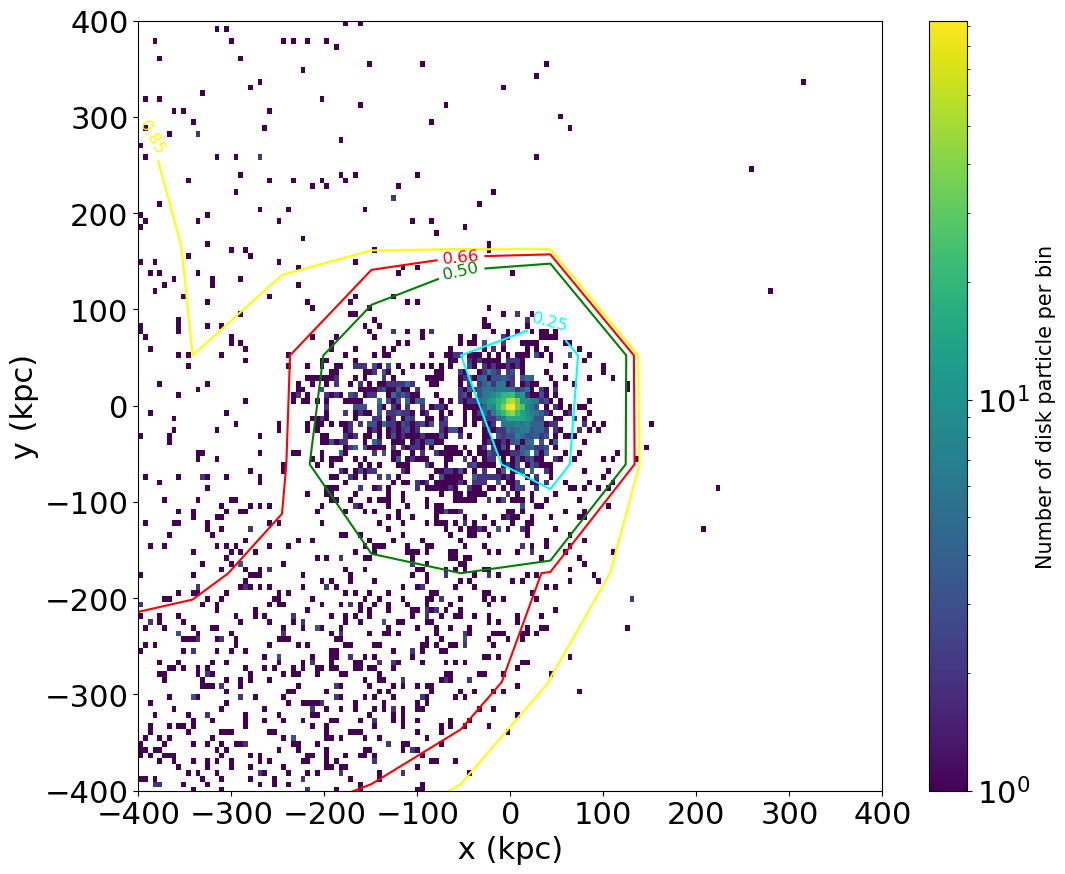

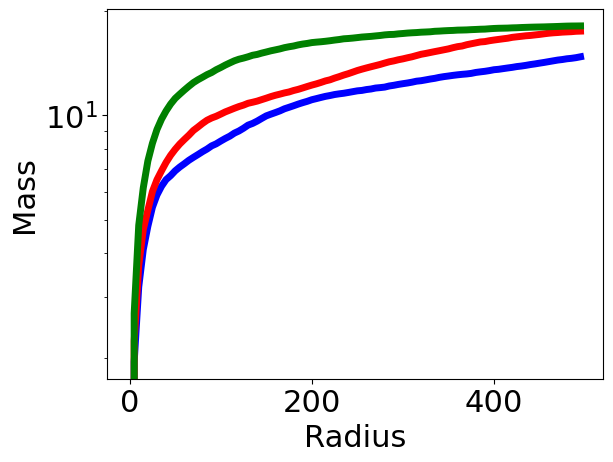

Hits 2/3s of total mass at radius 315 along the x axis
Hits 2/3s of total mass at radius 215 along the y axis
Hits 2/3s of total mass at radius 75 along the z axis
M33_340.txt


FileNotFoundError: [Errno 2] No such file or directory: 'M33_340.txt'

In [500]:
galaxy = 'M33'
for i in snaps:
    ilbl = '000' + str(i)
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl+ '.txt'
    print (filename)
    rn, mnew = mass_prof(filename,1,'yes')
    Radius = np.arange(0,500,5)
    tm, rad = mass_profile(Radius,mnew,rn,'x')
    mass_profiles = MassProfileplt(Radius,mnew,rn)